## Proyecto 3. Entrega 2
### Analsisis Data Final
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

In [167]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [168]:
# Cargar el archivo CSV
csv_path = "DataFinal.csv"
df = pd.read_csv(csv_path)

# Mostrar la información inicial del DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 45 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Grupo de Edad                                                                  117 non-null    object 
 1   Año                                                                            117 non-null    int64  
 2   Total VI Victima                                                               117 non-null    float64
 3   Total VI Agresor                                                               117 non-null    float64
 4   VI Victima Hombre                                                              117 non-null    float64
 5   VI Victima Mujer                                                               117 non-null    int64  
 6   VI Agresor Hombre         

Grupo de Edad  Año  Total VI Victima  Total VI Agresor  VI Victima Hombre  \
0    14 o menos    9             251.0               0.0               27.0   
1         15-19    9            2748.0             992.0              119.0   
2         20-24    9            5955.0            4385.0              368.0   
3         25-29    9            6190.0            6017.0              478.0   
4         30-34    9            5154.0            5358.0              438.0   

   VI Victima Mujer  VI Agresor Hombre  VI Agresor Mujer  VI Urbano  VI Rural  \
0               194               10.0                33        134     114.0   
1              2629              767.0               225       1809    1622.0   
2              5587             3805.0               580       5450    3936.0   
3              5712             5380.0               637       6664    4334.0   
4              4716             4841.0               517       5732    3731.0   

   ...  Profesionales científicos e intelectuales  \
0  ...                                          0   
1  ...                                        345   
2  ...                                       3214   
3  ...                                       3197   
4  ...                                       2376   

   Técnicos y profesionales de nivel medio  Personal de apoyo administrativo  \
0                                        0                                 2   
1                                      214                               380   
2                                      942                              2527   
3                                      837                              3371   
4                                      431                              2136   

   Trabajadores de los servicios y vendedores de comercios y mercados  \
0                                                 18                    
1                                                657                    
2                                               1496                    
3                                               1338                    
4                                                900                    

   Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros  \
0                                                  2                               
1                                                 22                               
2                                                 42                               
3                                                 32                               
4                                                 26                               

   Oficiales, operarios y artesanos de artes mecánicas y de otros oficios  \
0                                                  3                        
1                                                211                        
2                                                657                        
3                                                680                        
4                                                549                        

   Operadores de instalaciones y máquinas y ensambladores  \
0                                                  0        
1                                                186        
2                                                728        
3                                                969        
4                                                698        

   Ocupaciones elementales  Ocupación no  especificada  Promedio de Hijos  
0                     2176                         1.0               1.04  
1                    55917                        36.0               1.25  
2                    89974                       225.0               1.94  
3                    69989                       191.0               3.00  
4                    46550                       101.0               4.25  

[5 rows x

In [169]:
# Revisar los tipos de datos de cada columna
print("Tipos de datos antes de la conversión:")
print(df.dtypes)

# Variables que deberían ser categóricas
categoricas_esperadas = ["Grupo de Edad", "Año"]

# Convertir 'Grupo de Edad' y 'Año' a tipo 'category'
for col in categoricas_esperadas:
    df[col] = df[col].astype("category")

print("\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos antes de la conversión:
Grupo de Edad                                                                     object
Año                                                                                int64
Total VI Victima                                                                 float64
Total VI Agresor                                                                 float64
VI Victima Hombre                                                                float64
VI Victima Mujer                                                                   int64
VI Agresor Hombre                                                                float64
VI Agresor Mujer                                                                   int64
VI Urbano                                                                          int64
VI Rural                                                                         float64
VI Victima Ninguno                                                     

In [170]:
# Identificar columnas que no son numéricas
no_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Variables no numéricas encontradas:")
print(no_numeric)

# Verificar si existen variables categóricas que no sean 'Grupo de Edad' o 'Año'
otras_categoricas = [col for col in no_numeric if col not in categoricas_esperadas]

if otras_categoricas:
    print("\nLas siguientes columnas son categóricas pero no deberían serlo:")
    print(otras_categoricas)
else:
    print("\nNo se encontraron variables categóricas adicionales.")


Variables no numéricas encontradas:
['Grupo de Edad', 'Año']

No se encontraron variables categóricas adicionales.


In [171]:
# Descripción general del DataFrame para variables numéricas
print("Descripción estadística de variables numéricas:")
print(df.describe())

# Descripción de las variables categóricas (esperadas)
print("\nDescripción de variables categóricas:")
for col in categoricas_esperadas:
    print(f"\nValor de la columna '{col}':")
    print(df[col].value_counts())


Descripción estadística de variables numéricas:
       Total VI Victima  Total VI Agresor  VI Victima Hombre  \
count        117.000000        117.000000         117.000000   
mean        3463.008547       3350.427350         770.752137   
std         1976.332381       1965.748591        1339.955621   
min            0.000000          0.000000          27.000000   
25%         2251.000000       1965.000000         222.000000   
50%         3070.000000       3191.000000         370.000000   
75%         5441.000000       5079.000000         474.000000   
max         6825.000000       6573.000000        6418.000000   

       VI Victima Mujer  VI Agresor Hombre  VI Agresor Mujer     VI Urbano  \
count        117.000000         117.000000        117.000000    117.000000   
mean        6471.846154        6039.367521        891.820513   7689.521368   
std         9272.480069        9189.584651       1376.008599  11271.130041   
min          124.000000          10.000000          8.000000   

In [172]:
df["Año"] = df["Año"].astype("category")
print(df.dtypes)


Grupo de Edad                                                                    category
Año                                                                              category
Total VI Victima                                                                  float64
Total VI Agresor                                                                  float64
VI Victima Hombre                                                                 float64
VI Victima Mujer                                                                    int64
VI Agresor Hombre                                                                 float64
VI Agresor Mujer                                                                    int64
VI Urbano                                                                           int64
VI Rural                                                                          float64
VI Victima Ninguno                                                                float64
VI Agresor

### Análisis de Normalidad

['Total VI Victima', 'Total VI Agresor', 'VI Victima Hombre', 'VI Victima Mujer', 'VI Agresor Hombre', 'VI Agresor Mujer', 'VI Urbano', 'VI Rural', 'VI Victima Ninguno', 'VI Agresor Ninguno', 'VI Victima Primaria', 'VI Agresor Primaria', 'VI Victima Básico', 'VI Agresor Básico', 'VI Victima Diversificado', 'VI Agresor Diversificado', 'VI Victima Universitario', 'VI Agresor Universitario', 'VI Victima Alfabeta', 'VI Agresor Alfabeta', 'VI Victima Analfabeta', 'VI Agresor Analfabeta', 'Total Nacimientos', 'N Soltero Madre', 'N Soltero Padre', 'N Casado Madre', 'N Casado Padre', 'N Unido Madre', 'N Unido Padre', 'N Ignorado Madre', 'N Ignorado Padre', 'Ocupaciones militares', 'Directores y gerentes', 'Profesionales científicos e intelectuales', 'Técnicos y profesionales de nivel medio', 'Personal de apoyo administrativo', 'Trabajadores de los servicios y vendedores de comercios y mercados', 'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros', 'Oficiales, operar

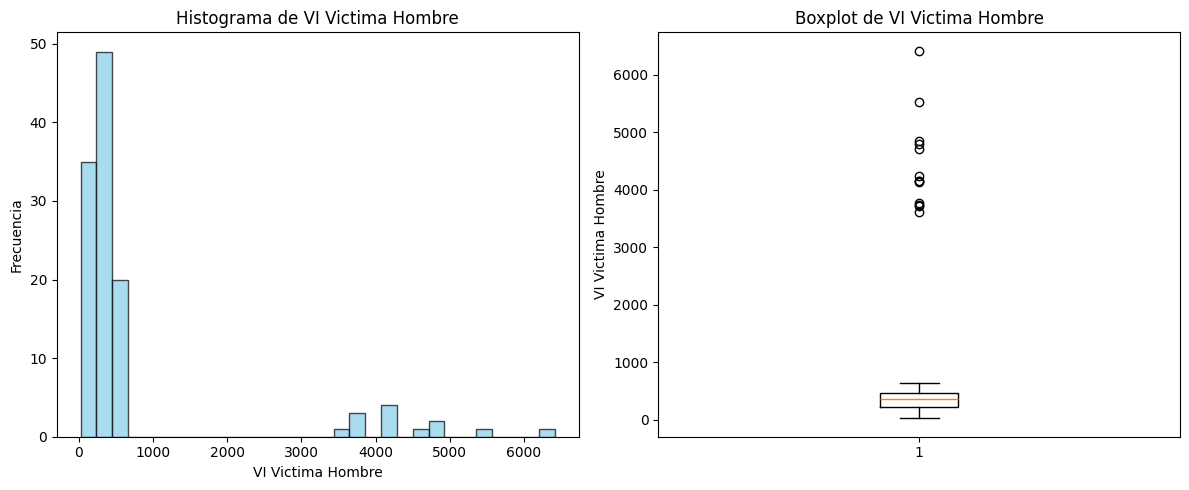


Prueba de normalidad para la columna de violencia 'VI Victima Mujer':
Estadístico de prueba (ks_statistic) = 0.38758596203182527073
p-value = 0.00000000000000024750
Se rechaza la hipótesis nula: los datos de 'VI Victima Mujer' NO provienen de una distribución normal.



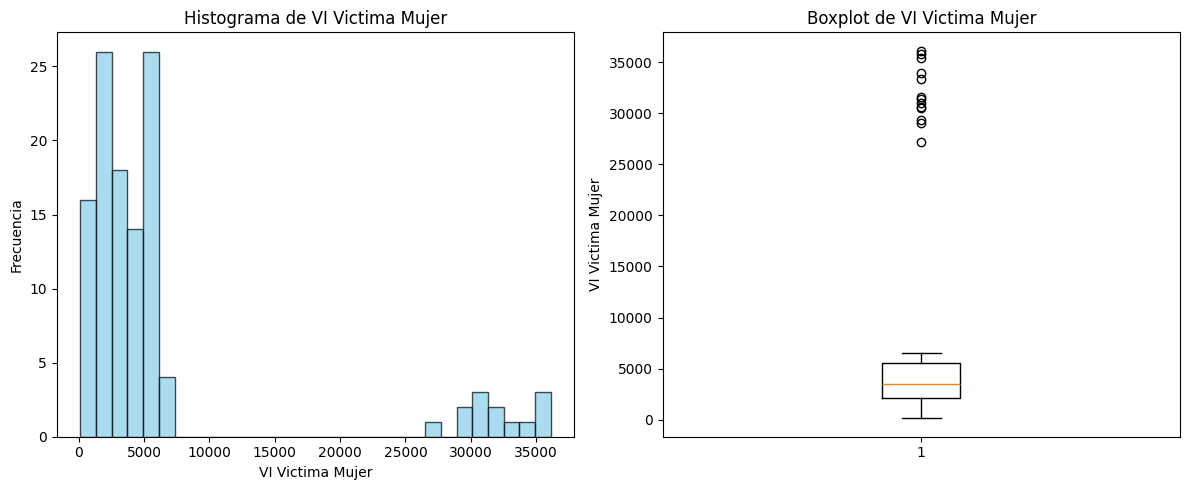


Prueba de normalidad para la columna de violencia 'VI Agresor Hombre':
Estadístico de prueba (ks_statistic) = 0.39971906490116554389
p-value = 0.00000000000000002210
Se rechaza la hipótesis nula: los datos de 'VI Agresor Hombre' NO provienen de una distribución normal.



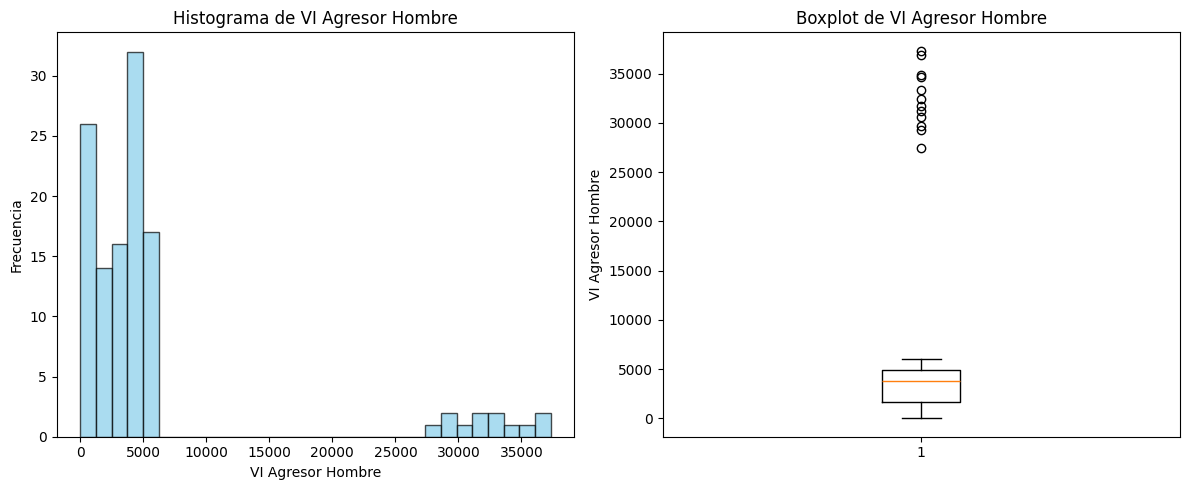


Prueba de normalidad para la columna de violencia 'VI Agresor Mujer':
Estadístico de prueba (ks_statistic) = 0.38135044367386405906
p-value = 0.00000000000000082834
Se rechaza la hipótesis nula: los datos de 'VI Agresor Mujer' NO provienen de una distribución normal.



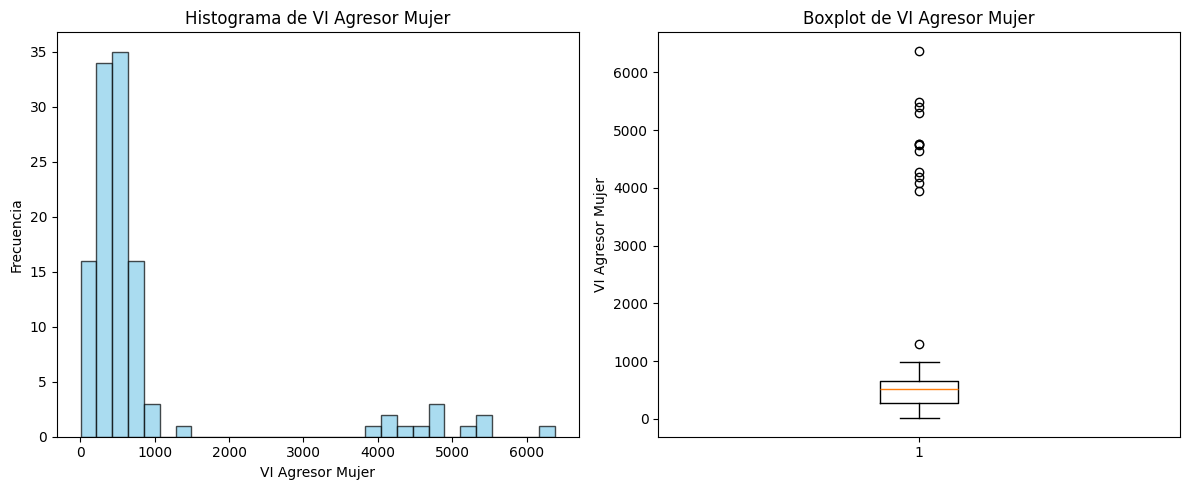


Prueba de normalidad para la columna de violencia 'VI Urbano':
Estadístico de prueba (ks_statistic) = 0.39871748065749917922
p-value = 0.00000000000000002707
Se rechaza la hipótesis nula: los datos de 'VI Urbano' NO provienen de una distribución normal.



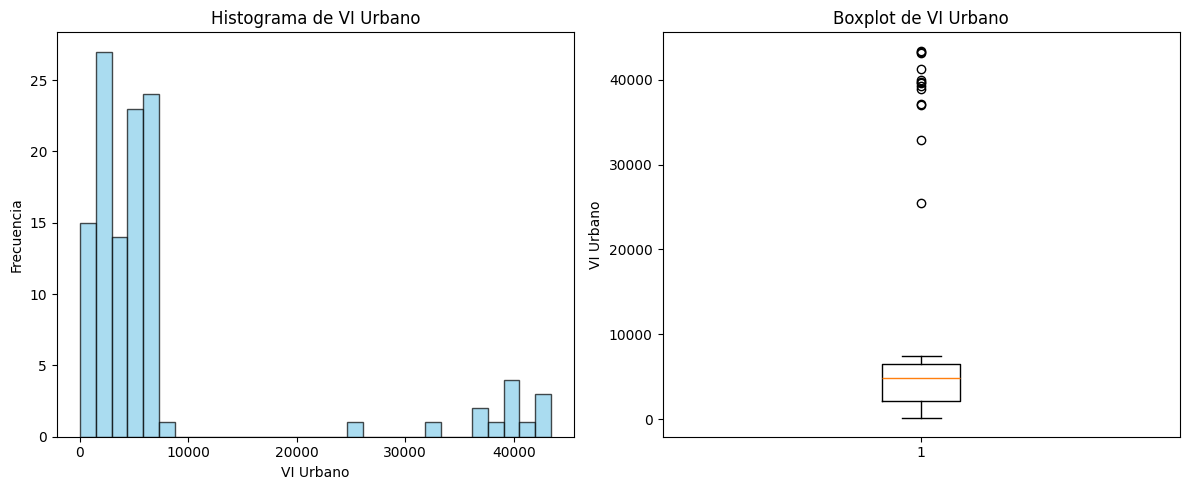


Prueba de normalidad para la columna de violencia 'VI Rural':
Estadístico de prueba (ks_statistic) = 0.40073342119000426864
p-value = 0.00000000000000001799
Se rechaza la hipótesis nula: los datos de 'VI Rural' NO provienen de una distribución normal.



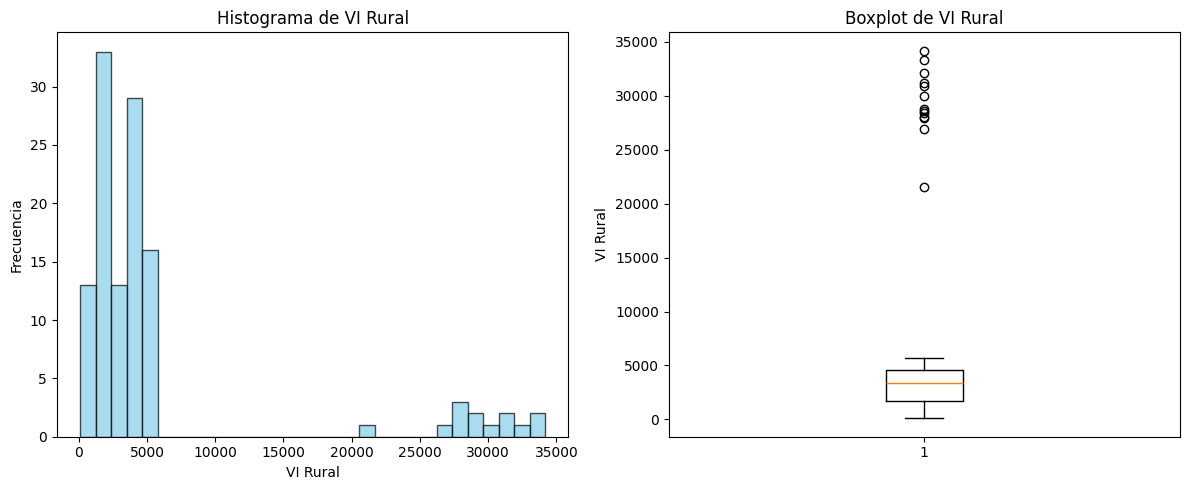


Prueba de normalidad para la columna de violencia 'VI Victima Ninguno':
Estadístico de prueba (ks_statistic) = 0.08794566674105236403
p-value = 0.30769124317953833181
No se rechaza la hipótesis nula: los datos de 'VI Victima Ninguno' parecen provenir de una distribución normal.



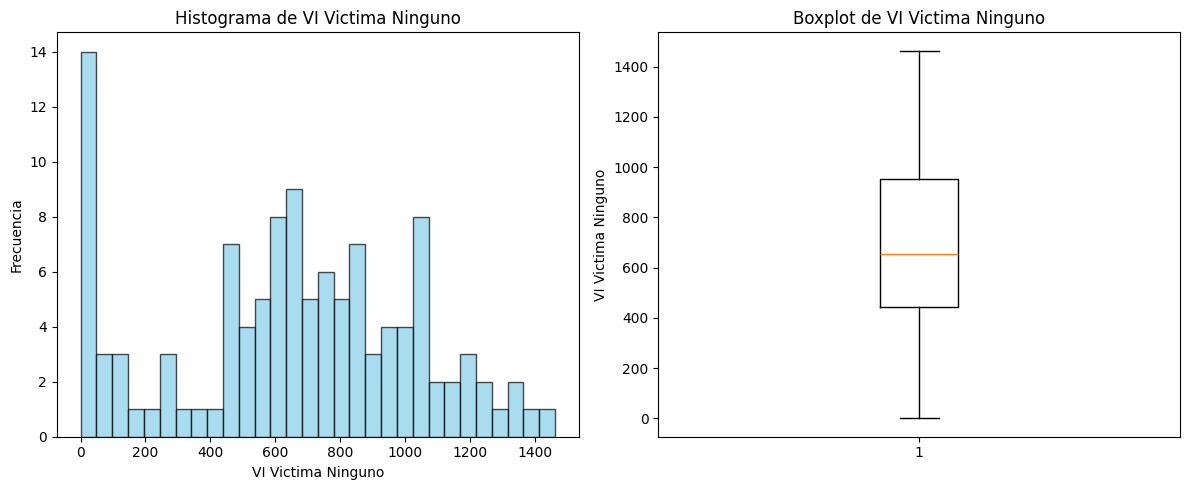


Prueba de normalidad para la columna de violencia 'VI Agresor Ninguno':
Estadístico de prueba (ks_statistic) = 0.13705771177412290340
p-value = 0.02227208731097718442
Se rechaza la hipótesis nula: los datos de 'VI Agresor Ninguno' NO provienen de una distribución normal.



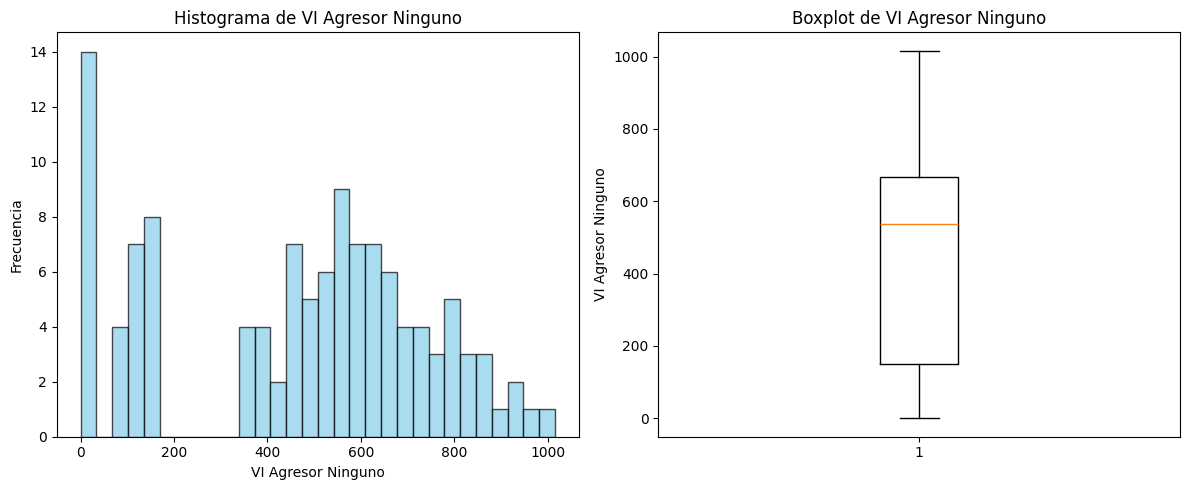


Prueba de normalidad para la columna de violencia 'VI Victima Primaria':
Estadístico de prueba (ks_statistic) = 0.08964723447219857810
p-value = 0.28652632379846243449
No se rechaza la hipótesis nula: los datos de 'VI Victima Primaria' parecen provenir de una distribución normal.



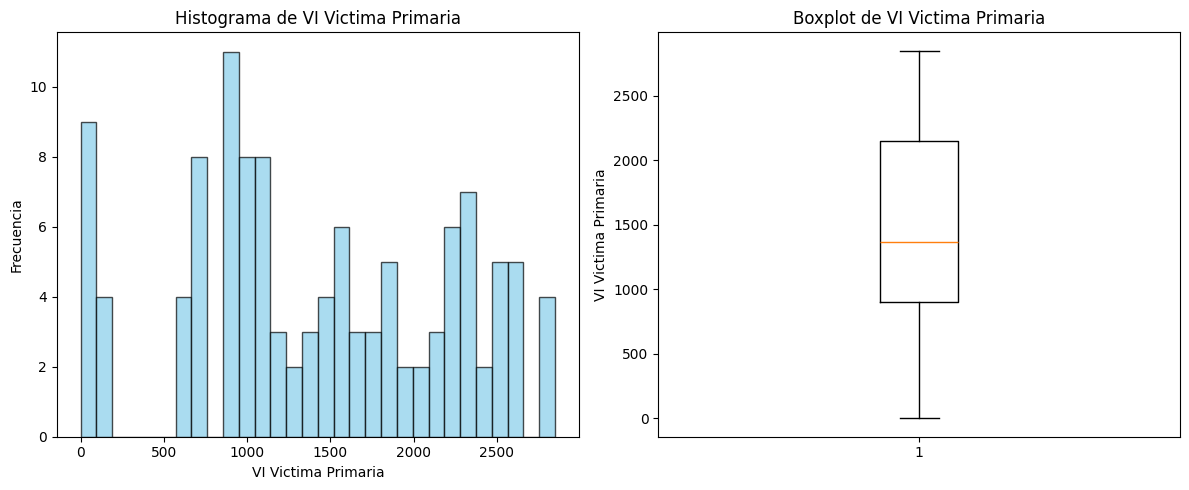


Prueba de normalidad para la columna de violencia 'VI Agresor Primaria':
Estadístico de prueba (ks_statistic) = 0.11160201582861495329
p-value = 0.10039874625541422848
No se rechaza la hipótesis nula: los datos de 'VI Agresor Primaria' parecen provenir de una distribución normal.



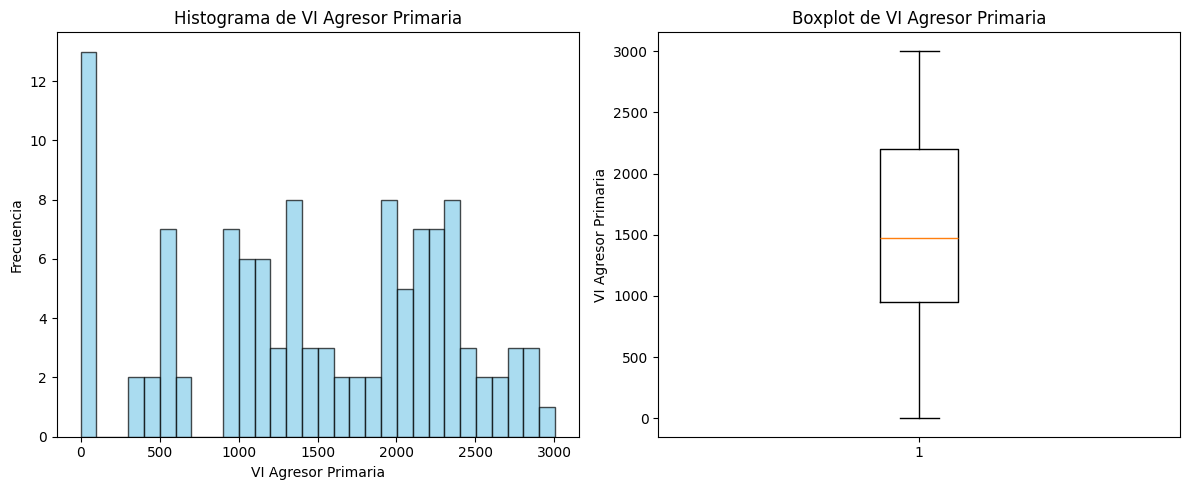


Prueba de normalidad para la columna de violencia 'VI Victima Básico':
Estadístico de prueba (ks_statistic) = 0.14137339980832314135
p-value = 0.01673183670213629348
Se rechaza la hipótesis nula: los datos de 'VI Victima Básico' NO provienen de una distribución normal.



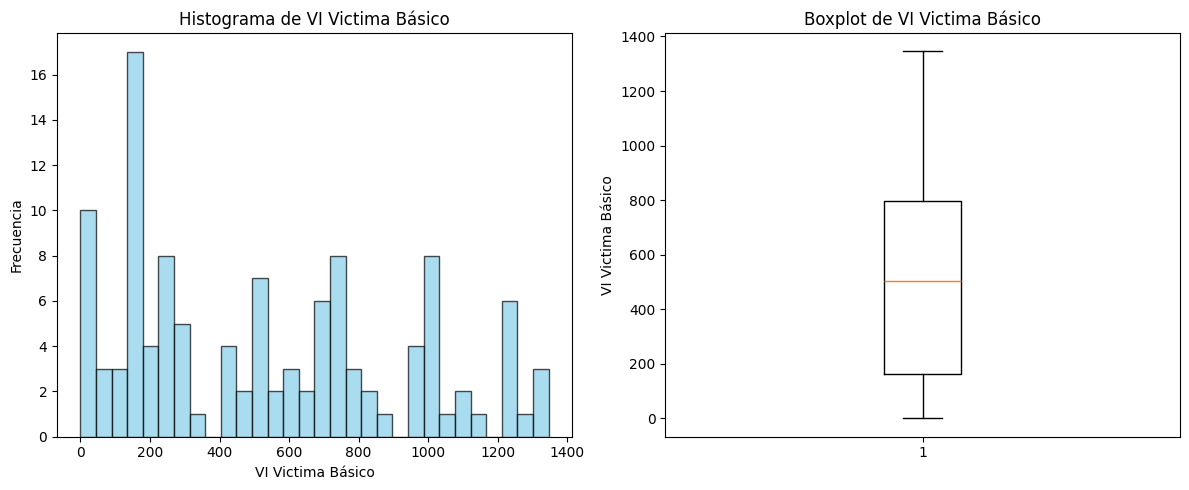


Prueba de normalidad para la columna de violencia 'VI Agresor Básico':
Estadístico de prueba (ks_statistic) = 0.16148462971612687067
p-value = 0.00392074991882829238
Se rechaza la hipótesis nula: los datos de 'VI Agresor Básico' NO provienen de una distribución normal.



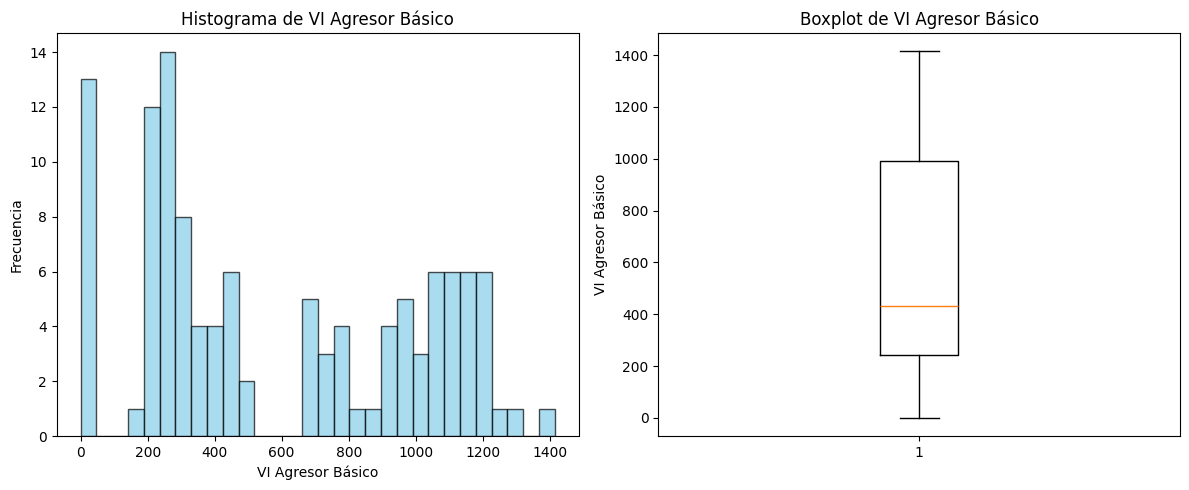


Prueba de normalidad para la columna de violencia 'VI Victima Diversificado':
Estadístico de prueba (ks_statistic) = 0.19788626348544718914
p-value = 0.00017215317631385097
Se rechaza la hipótesis nula: los datos de 'VI Victima Diversificado' NO provienen de una distribución normal.



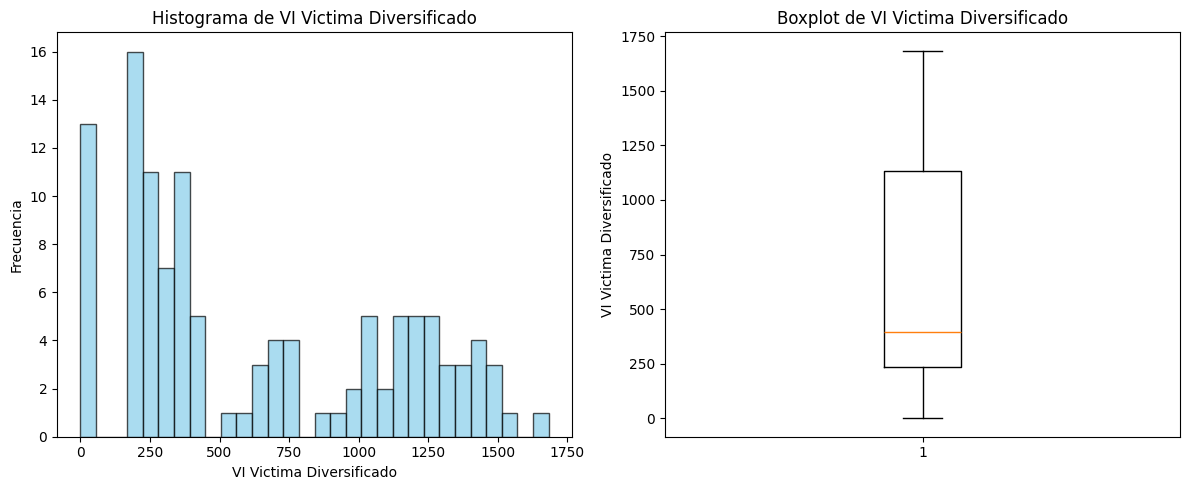


Prueba de normalidad para la columna de violencia 'VI Agresor Diversificado':
Estadístico de prueba (ks_statistic) = 0.14384018199458775689
p-value = 0.01415139324429703915
Se rechaza la hipótesis nula: los datos de 'VI Agresor Diversificado' NO provienen de una distribución normal.



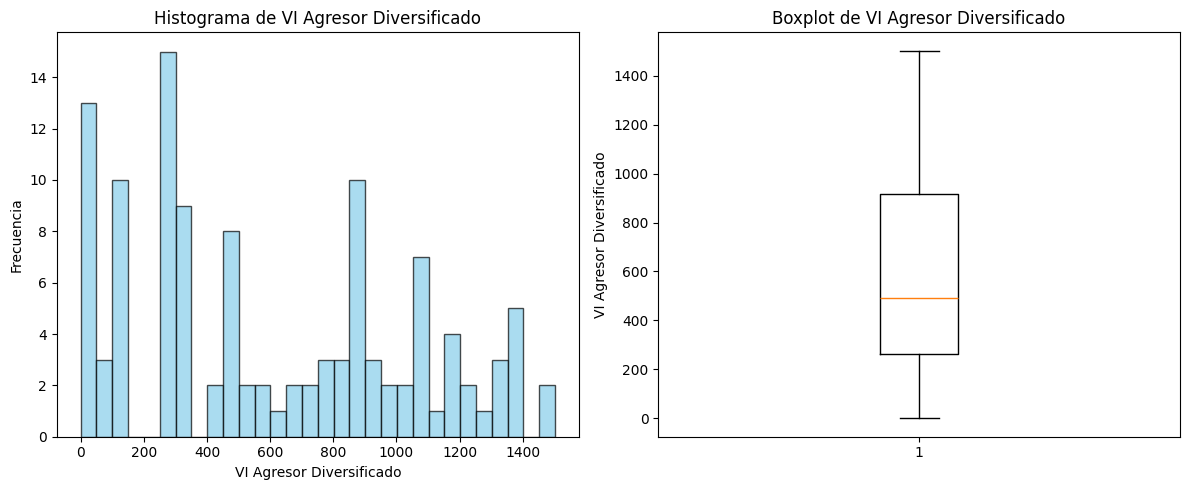


Prueba de normalidad para la columna de violencia 'VI Victima Universitario':
Estadístico de prueba (ks_statistic) = 0.10440468852403306244
p-value = 0.14529307394016388599
No se rechaza la hipótesis nula: los datos de 'VI Victima Universitario' parecen provenir de una distribución normal.



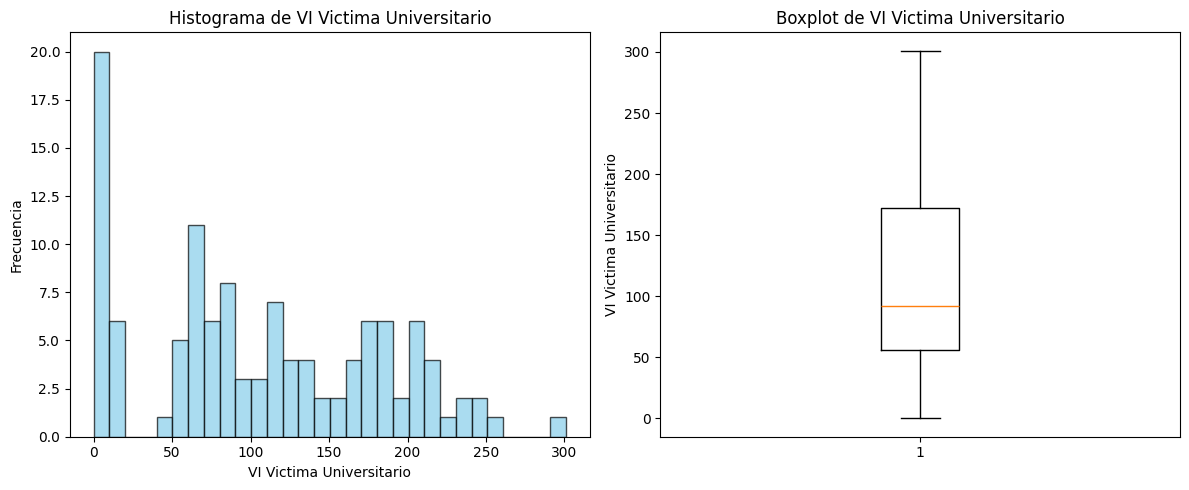


Prueba de normalidad para la columna de violencia 'VI Agresor Universitario':
Estadístico de prueba (ks_statistic) = 0.14298126425646690008
p-value = 0.01500625688785695022
Se rechaza la hipótesis nula: los datos de 'VI Agresor Universitario' NO provienen de una distribución normal.



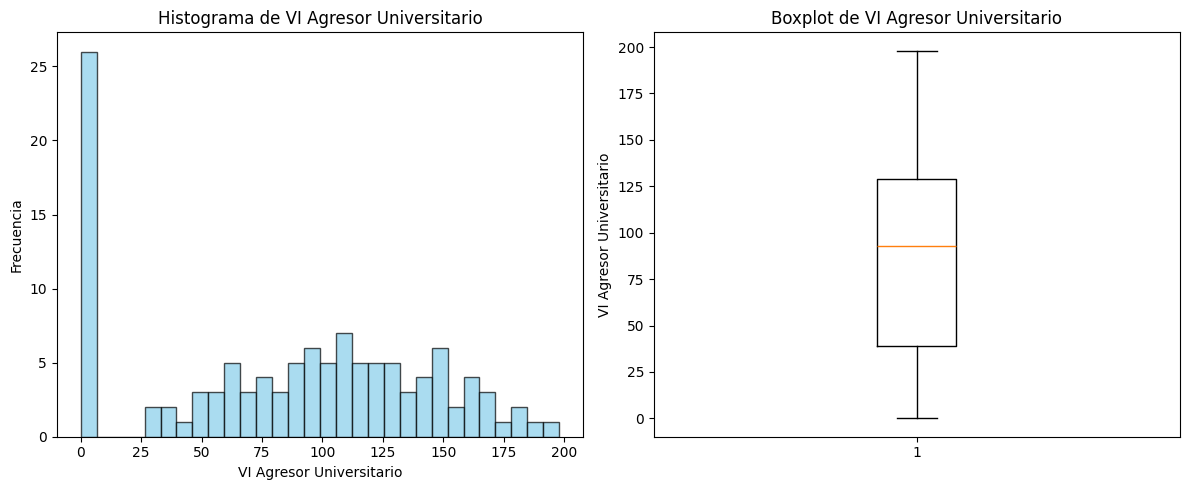


Prueba de normalidad para la columna de violencia 'VI Victima Alfabeta':
Estadístico de prueba (ks_statistic) = 0.11612924785626471680
p-value = 0.07856809758507266039
No se rechaza la hipótesis nula: los datos de 'VI Victima Alfabeta' parecen provenir de una distribución normal.



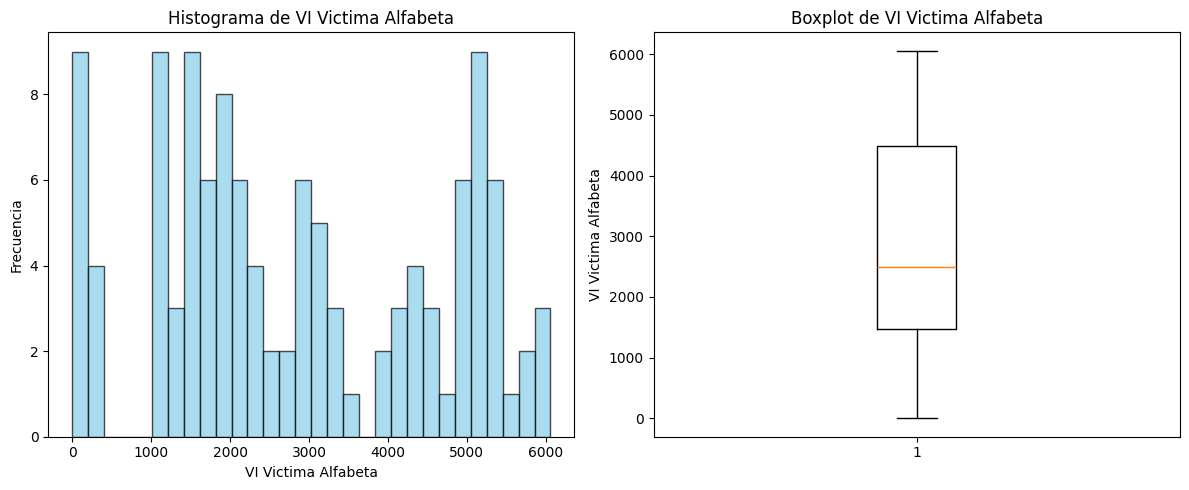


Prueba de normalidad para la columna de violencia 'VI Agresor Alfabeta':
Estadístico de prueba (ks_statistic) = 0.11681074843304595223
p-value = 0.07565699903731926135
No se rechaza la hipótesis nula: los datos de 'VI Agresor Alfabeta' parecen provenir de una distribución normal.



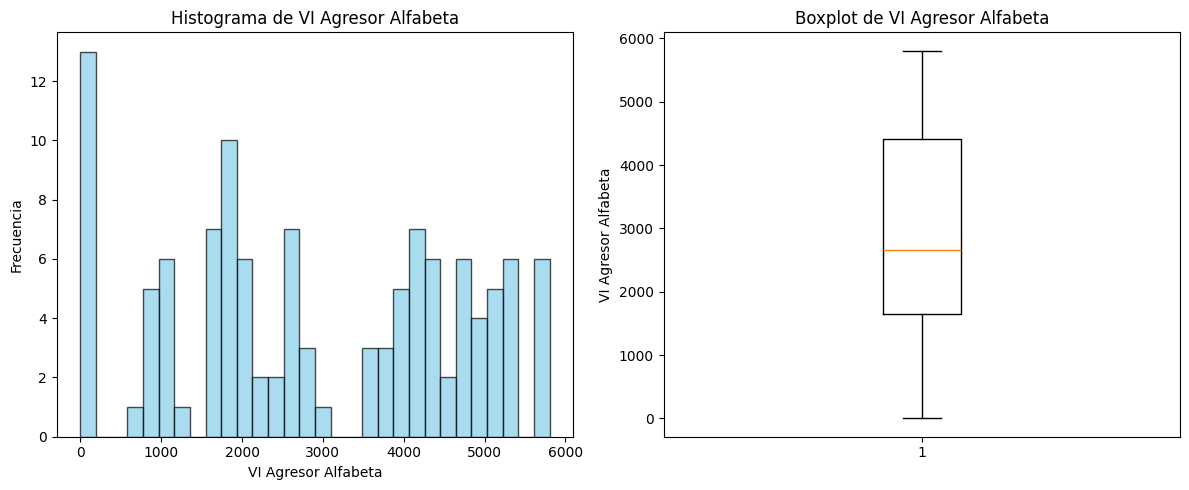


Prueba de normalidad para la columna de violencia 'VI Victima Analfabeta':
Estadístico de prueba (ks_statistic) = 0.07484045969875419146
p-value = 0.50493389263754684393
No se rechaza la hipótesis nula: los datos de 'VI Victima Analfabeta' parecen provenir de una distribución normal.



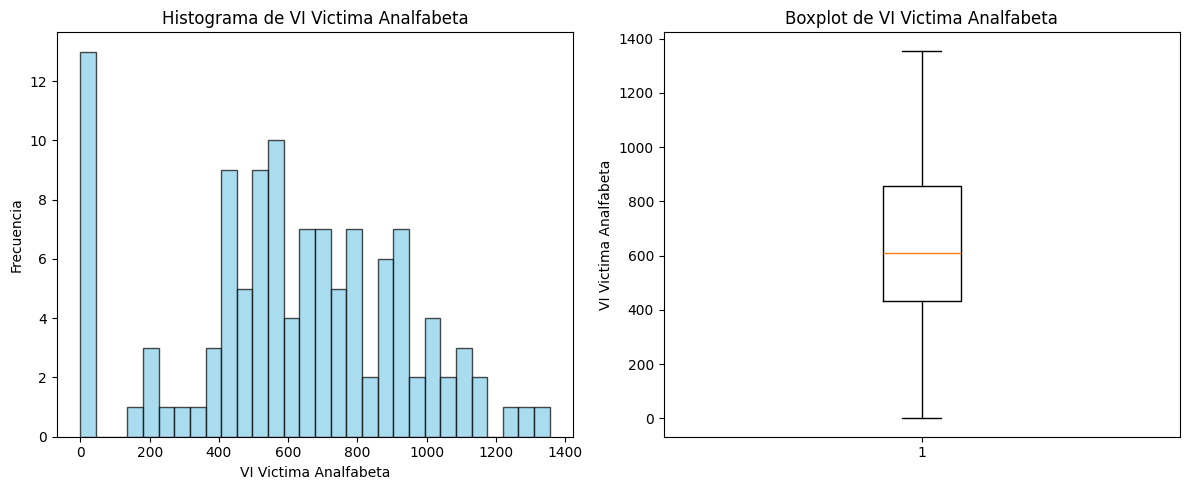


Prueba de normalidad para la columna de violencia 'VI Agresor Analfabeta':
Estadístico de prueba (ks_statistic) = 0.11682662556878842253
p-value = 0.07559028005034162945
No se rechaza la hipótesis nula: los datos de 'VI Agresor Analfabeta' parecen provenir de una distribución normal.



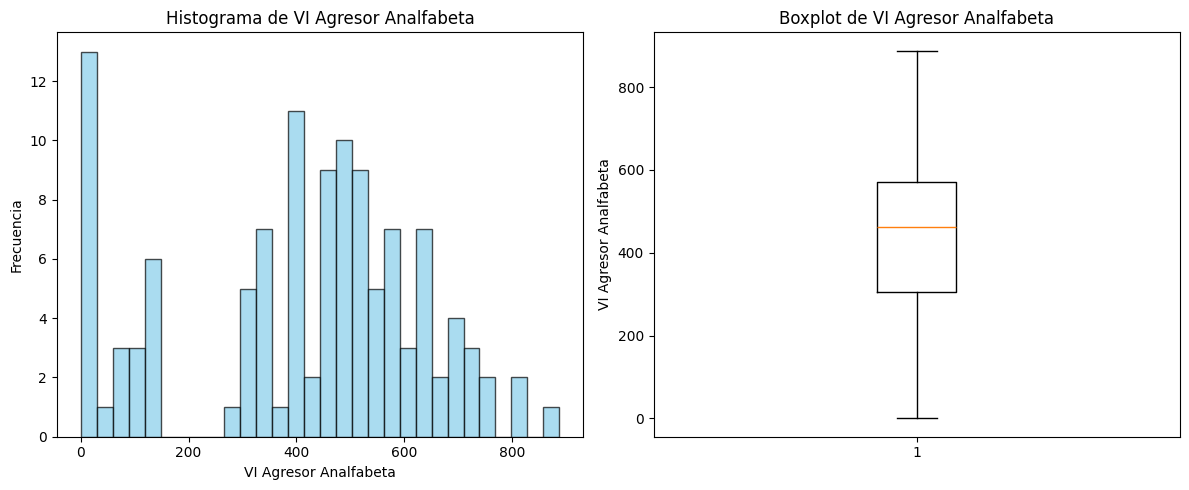


Prueba de normalidad para la columna de violencia 'Total VI Victima':
Estadístico de prueba (ks_statistic) = 0.10045152074454100077
p-value = 0.17611778194427152311
No se rechaza la hipótesis nula: los datos de 'Total VI Victima' parecen provenir de una distribución normal.



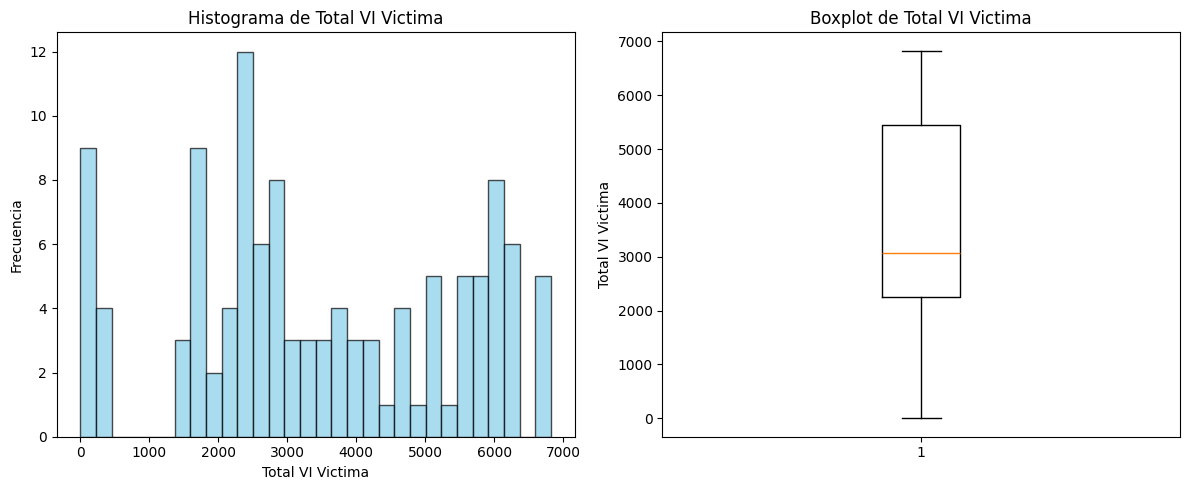


Prueba de normalidad para la columna de violencia 'Total VI Agresor':
Estadístico de prueba (ks_statistic) = 0.11900728383293568413
p-value = 0.06688745465755385755
No se rechaza la hipótesis nula: los datos de 'Total VI Agresor' parecen provenir de una distribución normal.



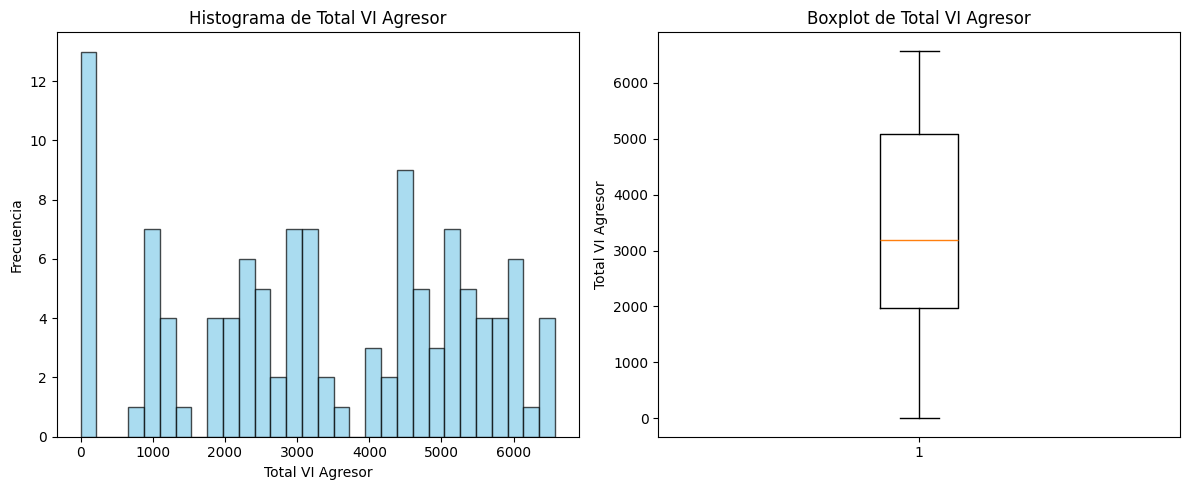


Prueba de normalidad para la columna de natalidad 'Total Nacimientos' sin ceros:
Estadístico de prueba (ks_statistic) = 0.21563185404835383263
p-value = 0.00002962266449131295
Se rechaza la hipótesis nula: los datos de 'Total Nacimientos' NO provienen de una distribución normal.



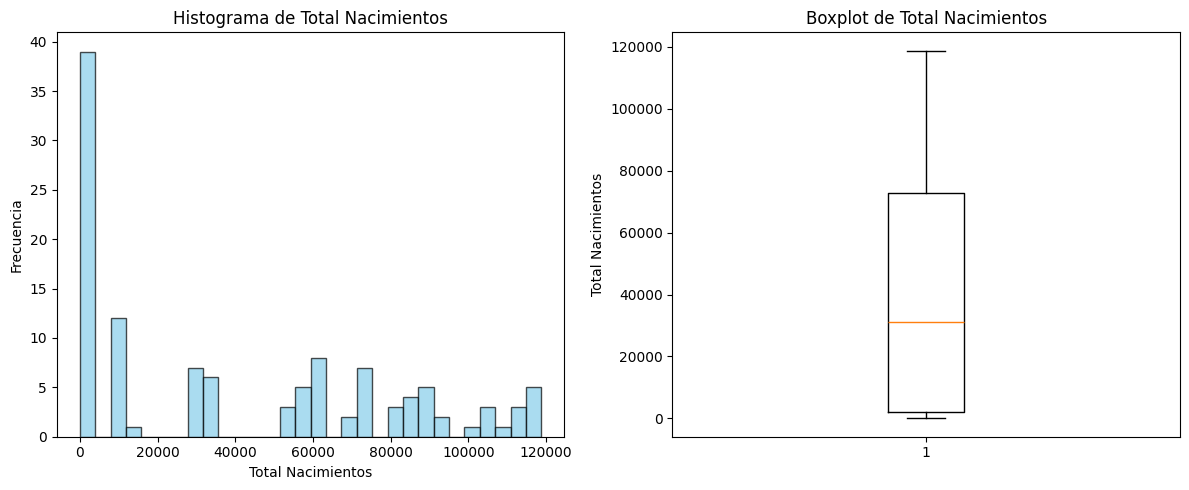


Prueba de normalidad para la columna de natalidad 'N Soltero Madre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.21271136745891500164
p-value = 0.00004000109106974148
Se rechaza la hipótesis nula: los datos de 'N Soltero Madre' NO provienen de una distribución normal.



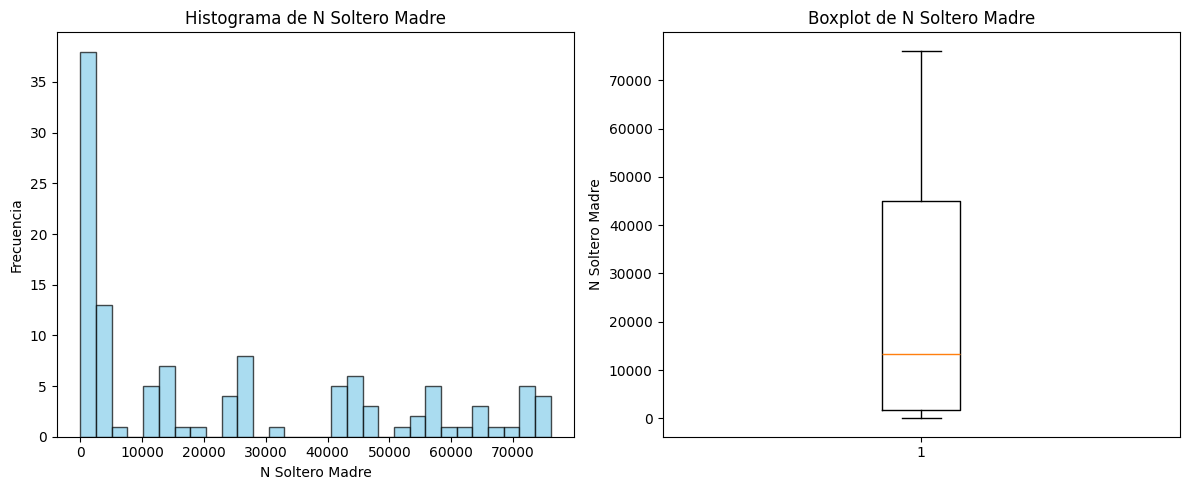


Prueba de normalidad para la columna de natalidad 'N Soltero Padre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.19528185510660123203
p-value = 0.00021998589454069503
Se rechaza la hipótesis nula: los datos de 'N Soltero Padre' NO provienen de una distribución normal.



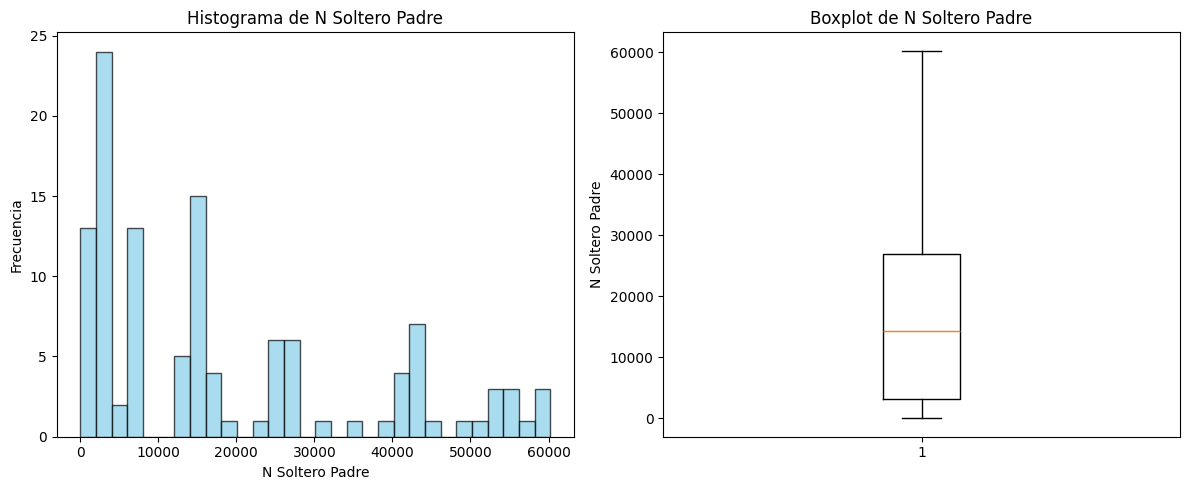


Prueba de normalidad para la columna de natalidad 'N Casado Madre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.19098633854960106460
p-value = 0.00047268468695802049
Se rechaza la hipótesis nula: los datos de 'N Casado Madre' NO provienen de una distribución normal.



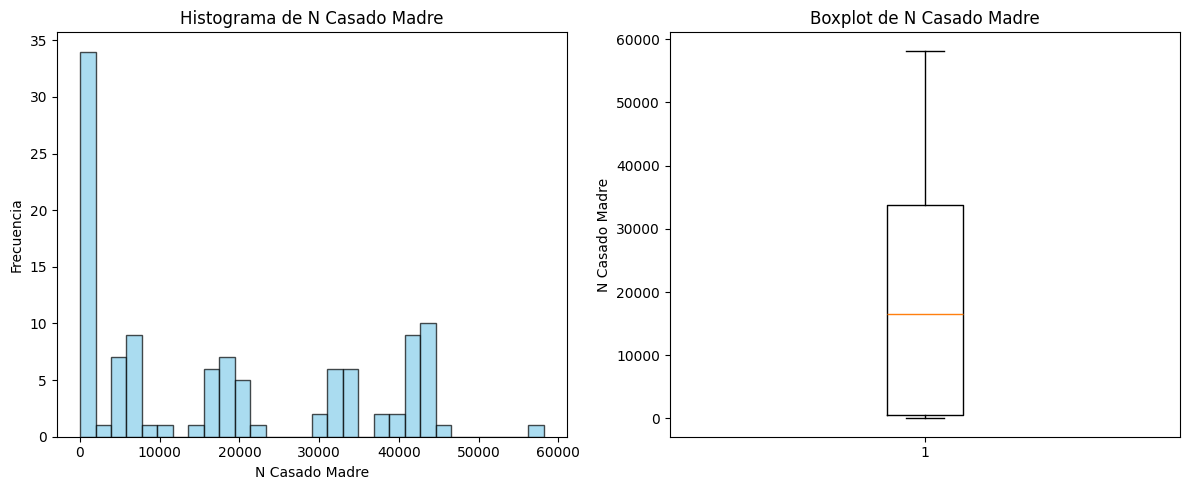


Prueba de normalidad para la columna de natalidad 'N Casado Padre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.19360855098381973827
p-value = 0.00047068152188497428
Se rechaza la hipótesis nula: los datos de 'N Casado Padre' NO provienen de una distribución normal.



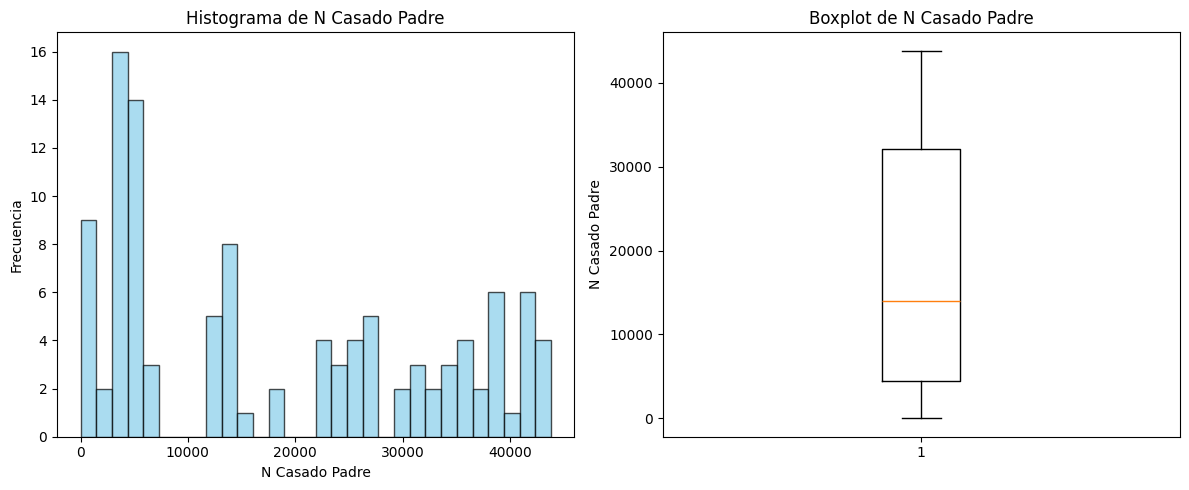


Prueba de normalidad para la columna de natalidad 'N Unido Madre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.18855421771577840495
p-value = 0.00089778590992395380
Se rechaza la hipótesis nula: los datos de 'N Unido Madre' NO provienen de una distribución normal.



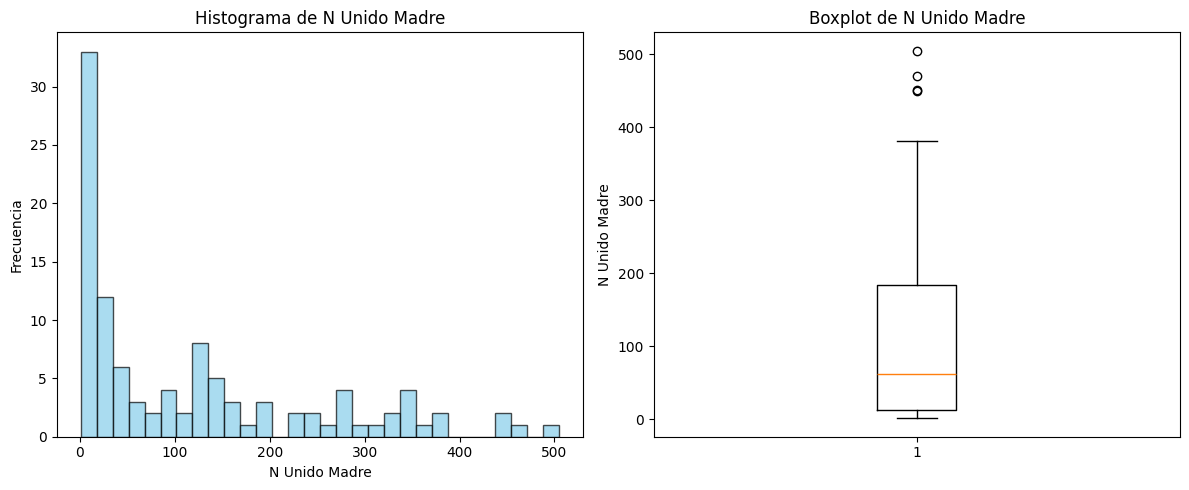


Prueba de normalidad para la columna de natalidad 'N Unido Padre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.14718029989980807581
p-value = 0.02681793361833917366
Se rechaza la hipótesis nula: los datos de 'N Unido Padre' NO provienen de una distribución normal.



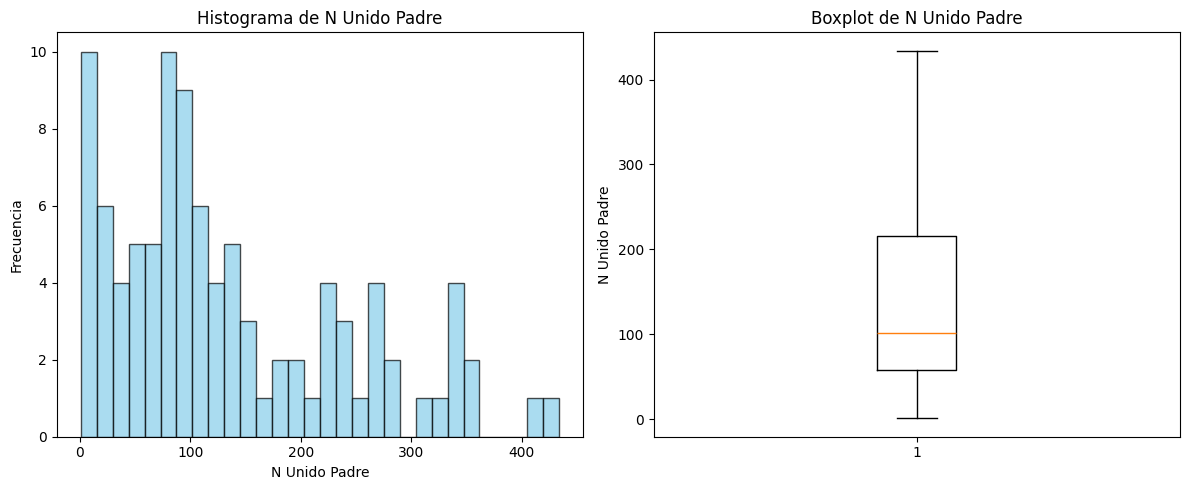


Prueba de normalidad para la columna de natalidad 'N Ignorado Madre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.23301729112984836956
p-value = 0.00006349549431566056
Se rechaza la hipótesis nula: los datos de 'N Ignorado Madre' NO provienen de una distribución normal.



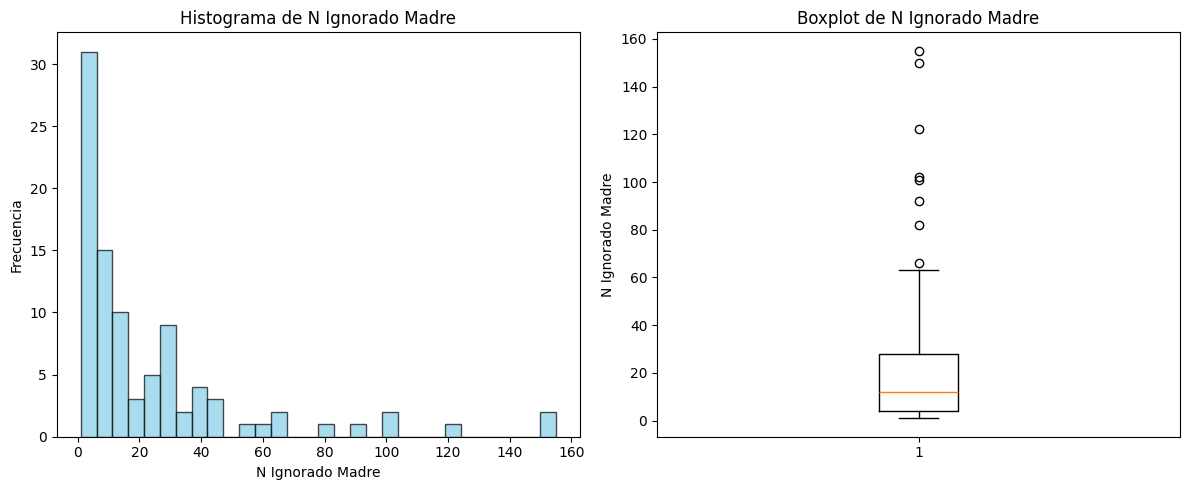


Prueba de normalidad para la columna de natalidad 'N Ignorado Padre' sin ceros:
Estadístico de prueba (ks_statistic) = 0.25814575655239757612
p-value = 0.00000301022128579881
Se rechaza la hipótesis nula: los datos de 'N Ignorado Padre' NO provienen de una distribución normal.



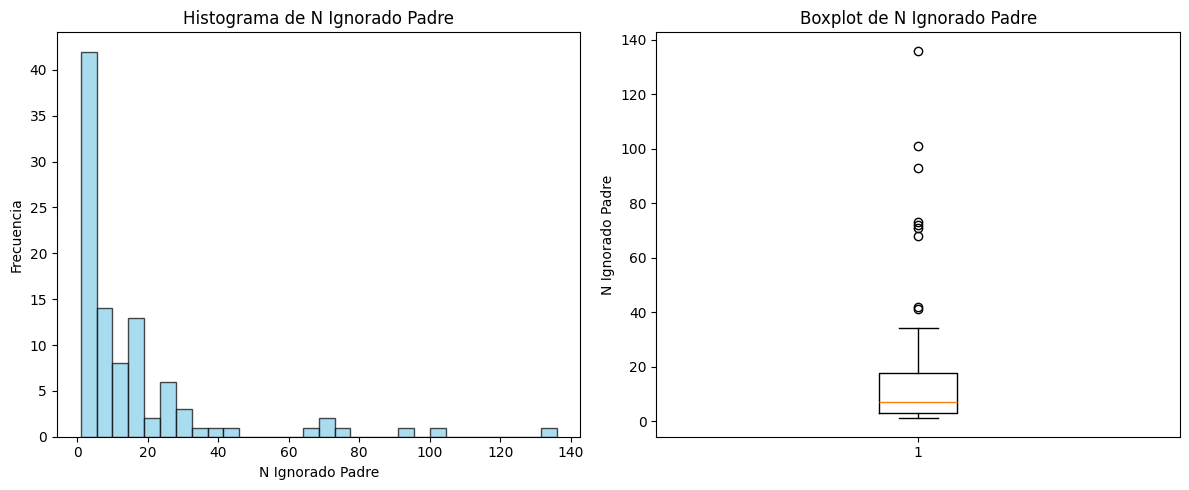


Prueba de normalidad para la columna de natalidad 'Ocupaciones militares' sin ceros:
Estadístico de prueba (ks_statistic) = 0.22199230041926343304
p-value = 0.01626490813656600309
Se rechaza la hipótesis nula: los datos de 'Ocupaciones militares' NO provienen de una distribución normal.



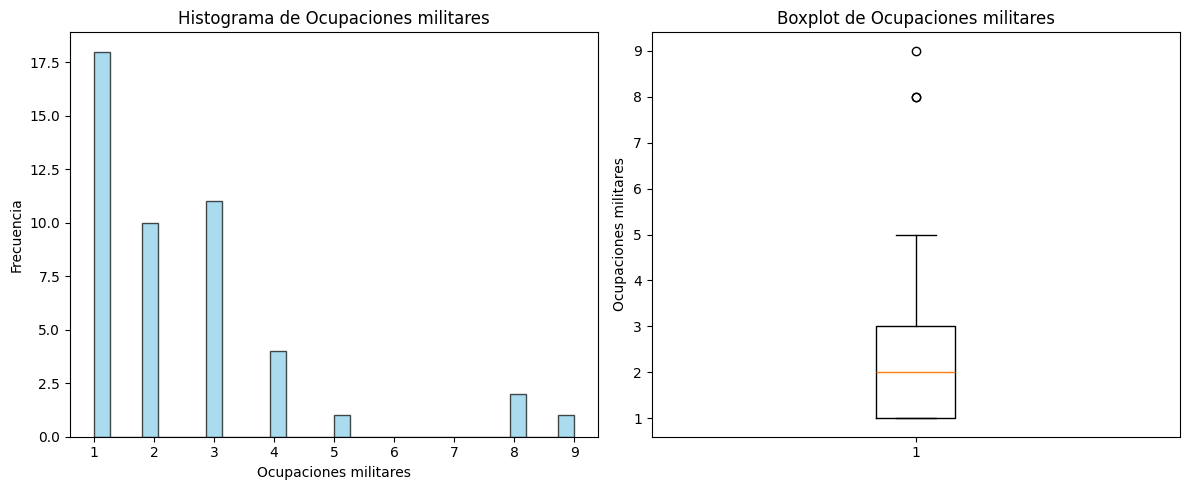


Prueba de normalidad para la columna de natalidad 'Directores y gerentes' sin ceros:
Estadístico de prueba (ks_statistic) = 0.19087439146246093502
p-value = 0.00465534343154283548
Se rechaza la hipótesis nula: los datos de 'Directores y gerentes' NO provienen de una distribución normal.



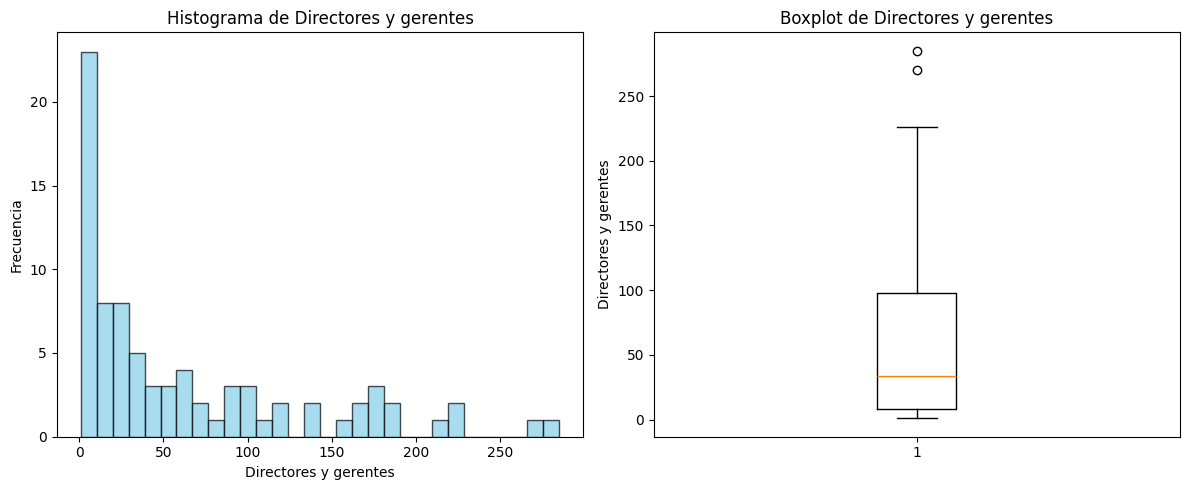


Prueba de normalidad para la columna de natalidad 'Profesionales científicos e intelectuales' sin ceros:
Estadístico de prueba (ks_statistic) = 0.24533415220972787374
p-value = 0.00000535237319430850
Se rechaza la hipótesis nula: los datos de 'Profesionales científicos e intelectuales' NO provienen de una distribución normal.



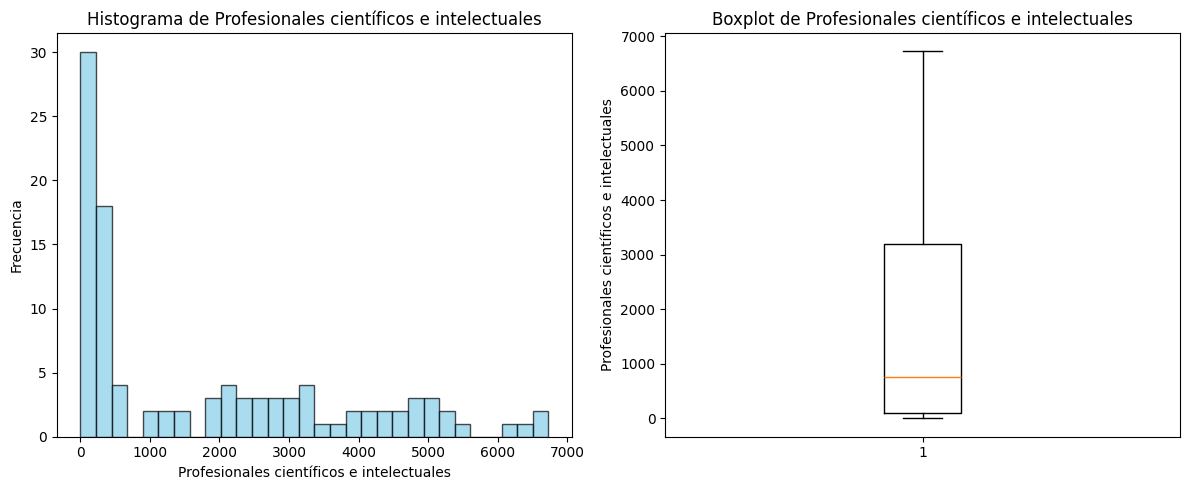


Prueba de normalidad para la columna de natalidad 'Técnicos y profesionales de nivel medio' sin ceros:
Estadístico de prueba (ks_statistic) = 0.19543847654120677371
p-value = 0.00074382329922451085
Se rechaza la hipótesis nula: los datos de 'Técnicos y profesionales de nivel medio' NO provienen de una distribución normal.



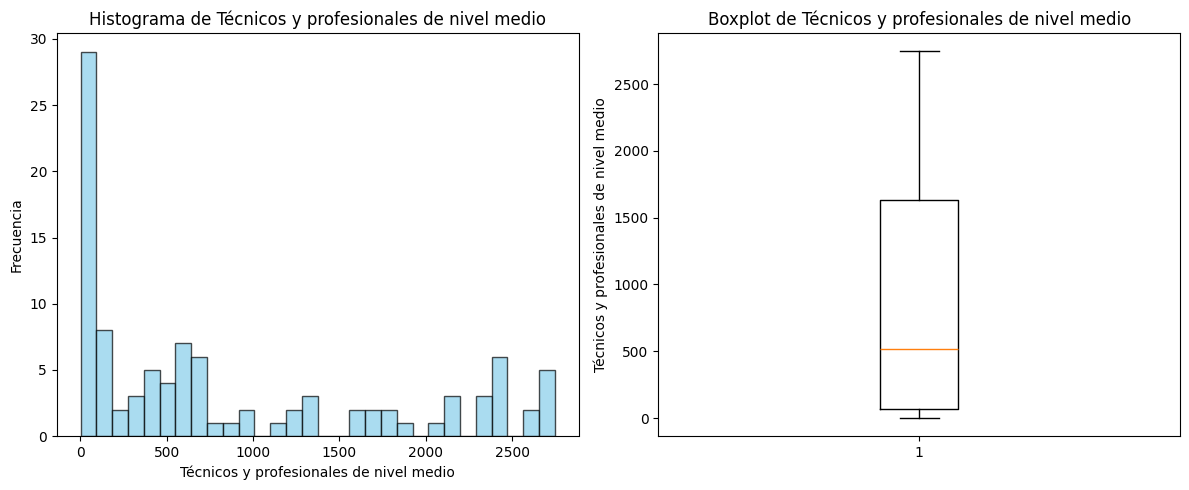


Prueba de normalidad para la columna de natalidad 'Personal de apoyo administrativo' sin ceros:
Estadístico de prueba (ks_statistic) = 0.22020111188392410551
p-value = 0.00006567639027612844
Se rechaza la hipótesis nula: los datos de 'Personal de apoyo administrativo' NO provienen de una distribución normal.



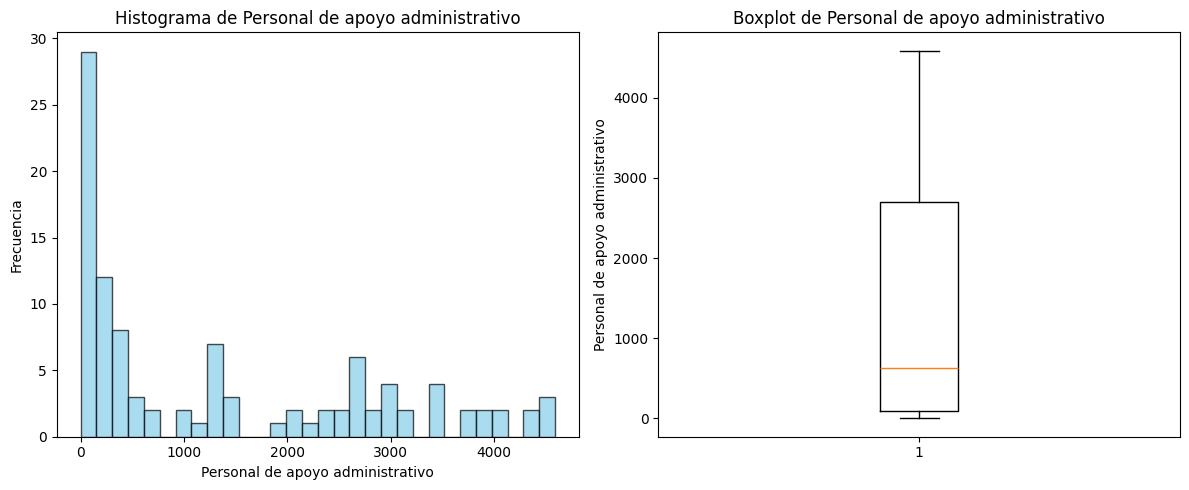


Prueba de normalidad para la columna de natalidad 'Trabajadores de los servicios y vendedores de comercios y mercados' sin ceros:
Estadístico de prueba (ks_statistic) = 0.18323081368373272948
p-value = 0.00085858065450172827
Se rechaza la hipótesis nula: los datos de 'Trabajadores de los servicios y vendedores de comercios y mercados' NO provienen de una distribución normal.



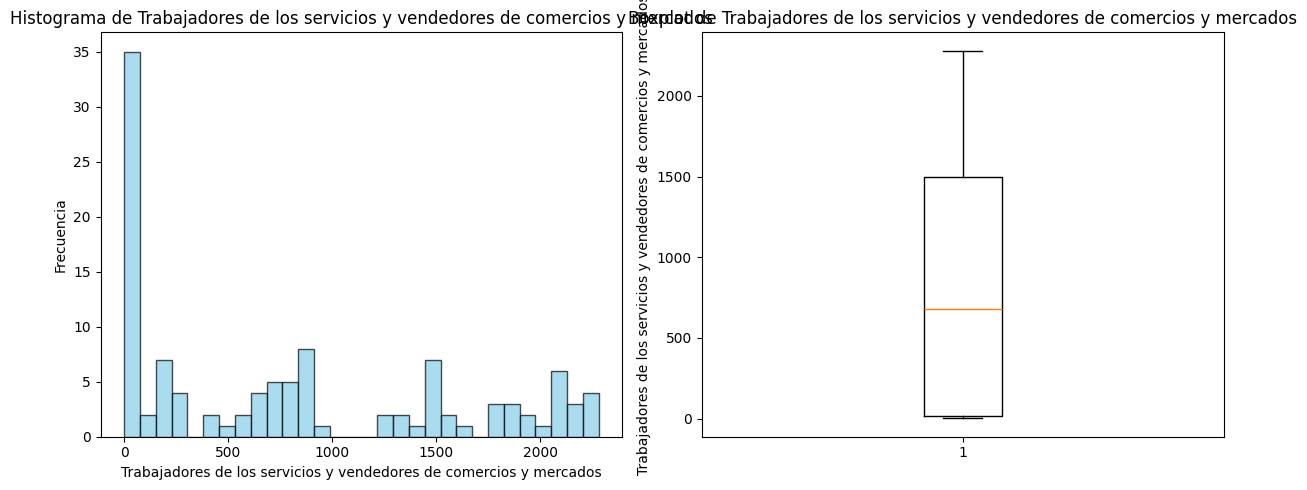


Prueba de normalidad para la columna de natalidad 'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros' sin ceros:
Estadístico de prueba (ks_statistic) = 0.40573806299807751996
p-value = 0.00000000000289813579
Se rechaza la hipótesis nula: los datos de 'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros' NO provienen de una distribución normal.



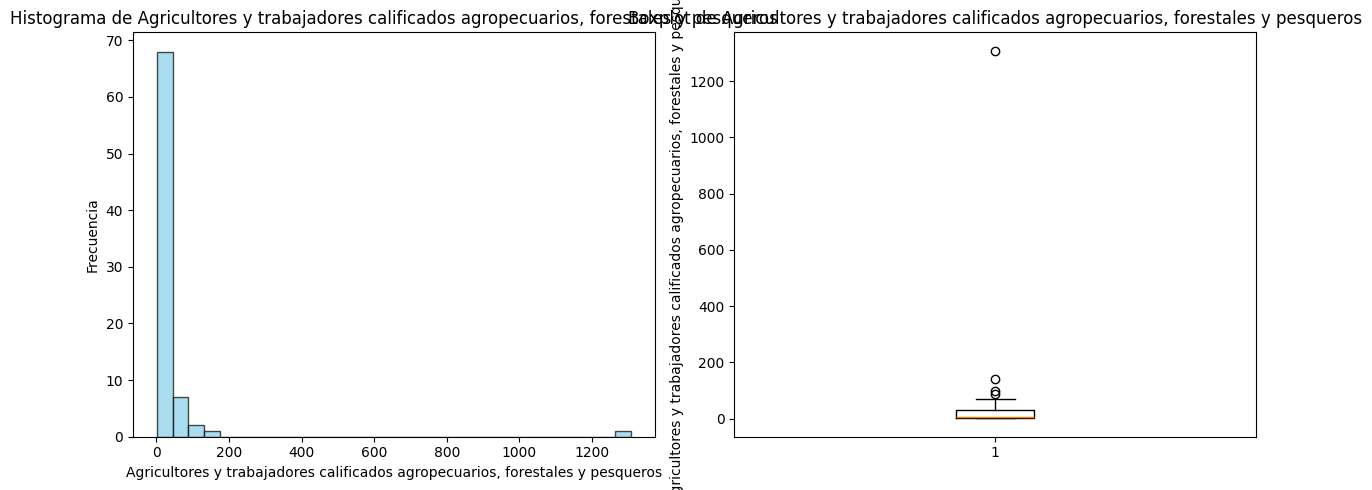


Prueba de normalidad para la columna de natalidad 'Oficiales, operarios y artesanos de artes mecánicas y de otros oficios' sin ceros:
Estadístico de prueba (ks_statistic) = 0.14152060094261798007
p-value = 0.02684945996885290675
Se rechaza la hipótesis nula: los datos de 'Oficiales, operarios y artesanos de artes mecánicas y de otros oficios' NO provienen de una distribución normal.



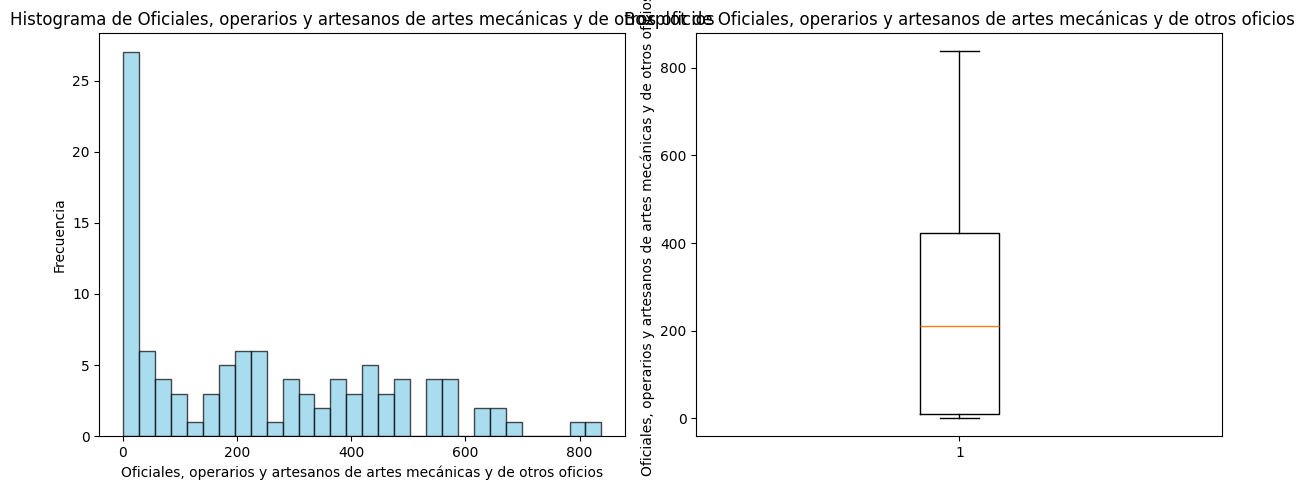


Prueba de normalidad para la columna de natalidad 'Operadores de instalaciones y máquinas y ensambladores' sin ceros:
Estadístico de prueba (ks_statistic) = 0.15809926824229925124
p-value = 0.00975469049625066198
Se rechaza la hipótesis nula: los datos de 'Operadores de instalaciones y máquinas y ensambladores' NO provienen de una distribución normal.



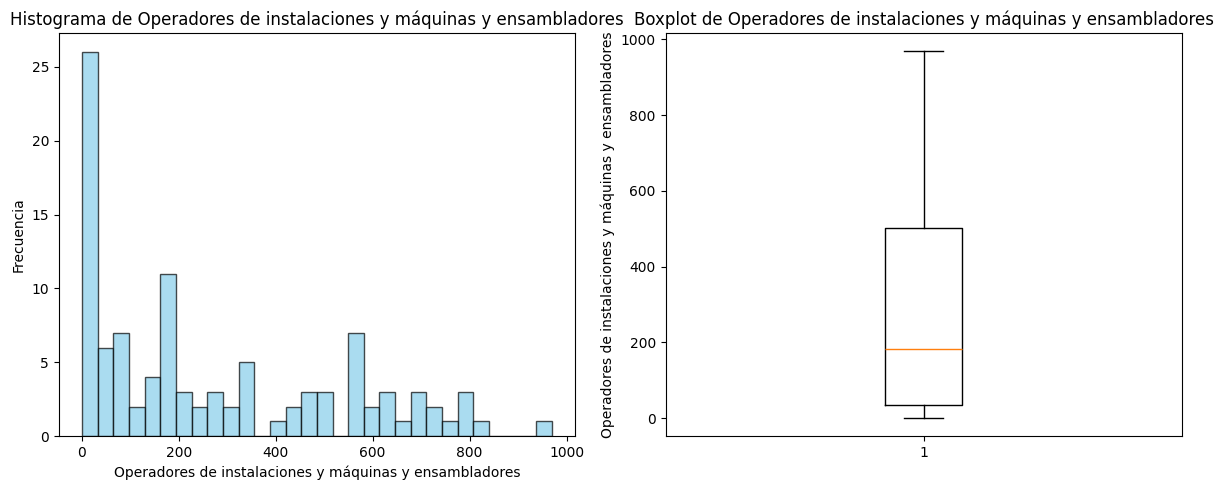


Prueba de normalidad para la columna de natalidad 'Ocupaciones elementales' sin ceros:
Estadístico de prueba (ks_statistic) = 0.41215723544005233858
p-value = 0.00000000000000034269
Se rechaza la hipótesis nula: los datos de 'Ocupaciones elementales' NO provienen de una distribución normal.



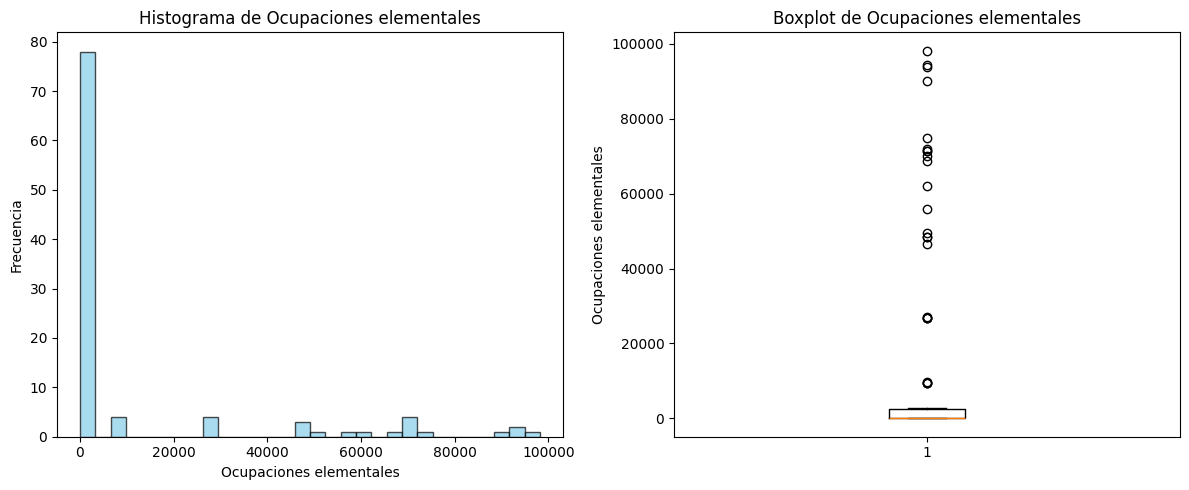


Prueba de normalidad para la columna de natalidad 'Ocupación no  especificada' sin ceros:
Estadístico de prueba (ks_statistic) = 0.15343861912390149849
p-value = 0.43654389277362948274
No se rechaza la hipótesis nula: los datos de 'Ocupación no  especificada' parecen provenir de una distribución normal.



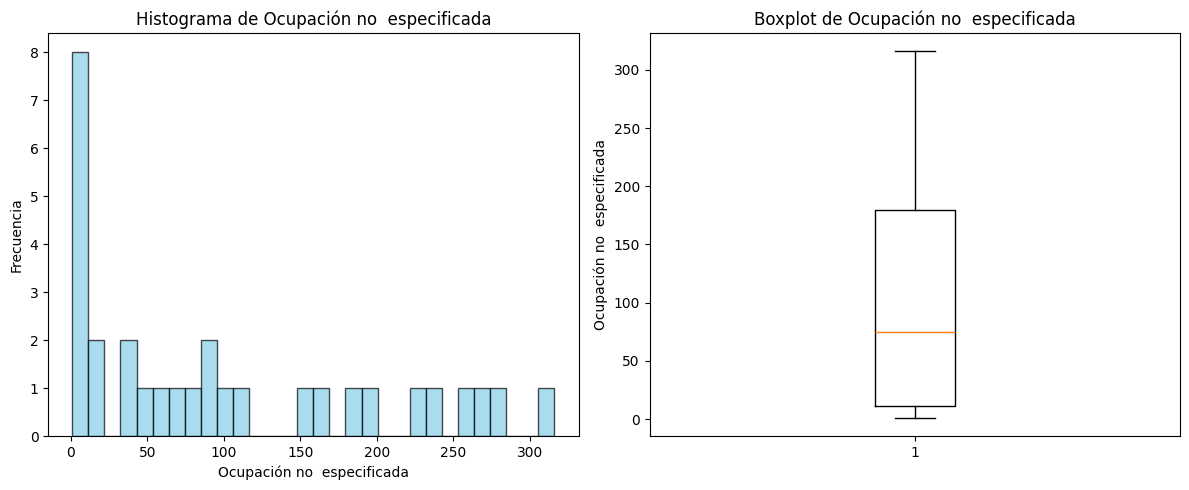


Prueba de normalidad para la columna de natalidad 'Promedio de Hijos' sin ceros:
Estadístico de prueba (ks_statistic) = 0.14783908066095075018
p-value = 0.01071950898661055973
Se rechaza la hipótesis nula: los datos de 'Promedio de Hijos' NO provienen de una distribución normal.



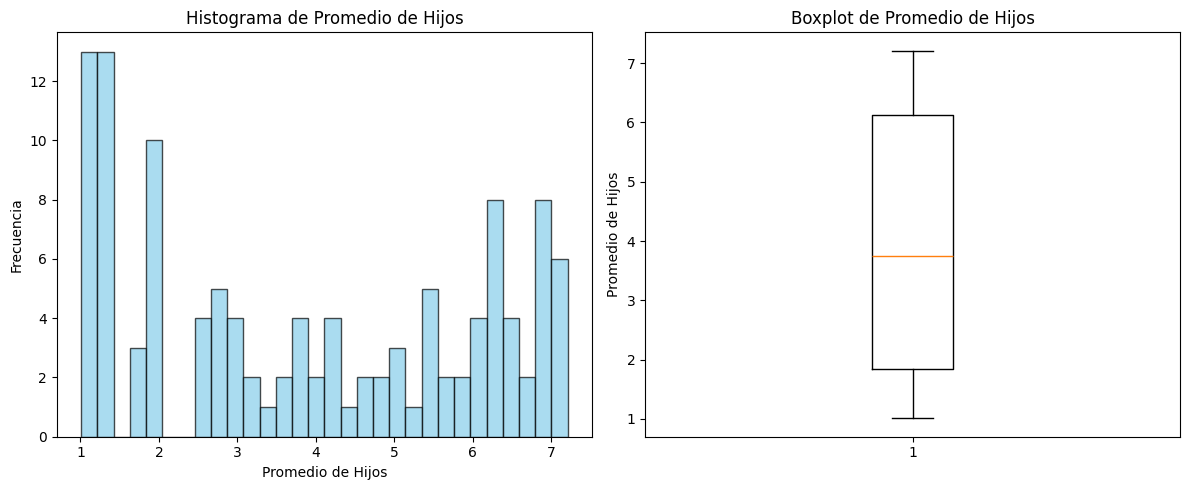

In [173]:
import normalidad

# Seleccionar las columnas numéricas
cuantitativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(cuantitativas)

# Separar las columnas de violencia (empiezan con 'VI')
violencia_columns = [col for col in cuantitativas if col.startswith('VI')]
violencia_columns.append('Total VI Victima')
violencia_columns.append('Total VI Agresor')

# Prueba de normalidad en las columnas de violencia (sin cambios)
for column_name in violencia_columns:
    column = df[column_name]  
    print(f"\nPrueba de normalidad para la columna de violencia '{column_name}':")
    normalidad.prueba_de_normalidad(column, column_name)

# Prueba de normalidad en las columnas de natalidad (sin ceros, solo las que no están en 'violencia_columns')
natalidad_columns = [col for col in cuantitativas if col not in violencia_columns]

for column_name in natalidad_columns:
    column = df[column_name]
    
    # Filtrar los ceros
    column_no_zeros = column[column != 0]
    
    # Verificar si la columna filtrada tiene suficientes datos
    if len(column_no_zeros) > 0:
        print(f"\nPrueba de normalidad para la columna de natalidad '{column_name}' sin ceros:")
        normalidad.prueba_de_normalidad(column_no_zeros, column_name)
    else:
        print(f"\nLa columna '{column_name}' no tiene datos después de eliminar ceros.")

      

### Frecuencia

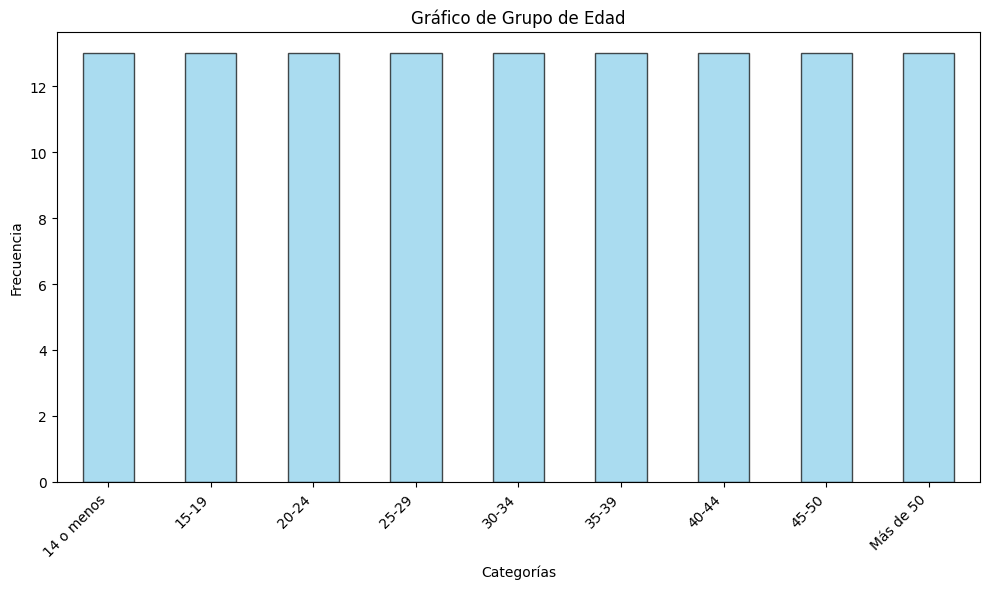

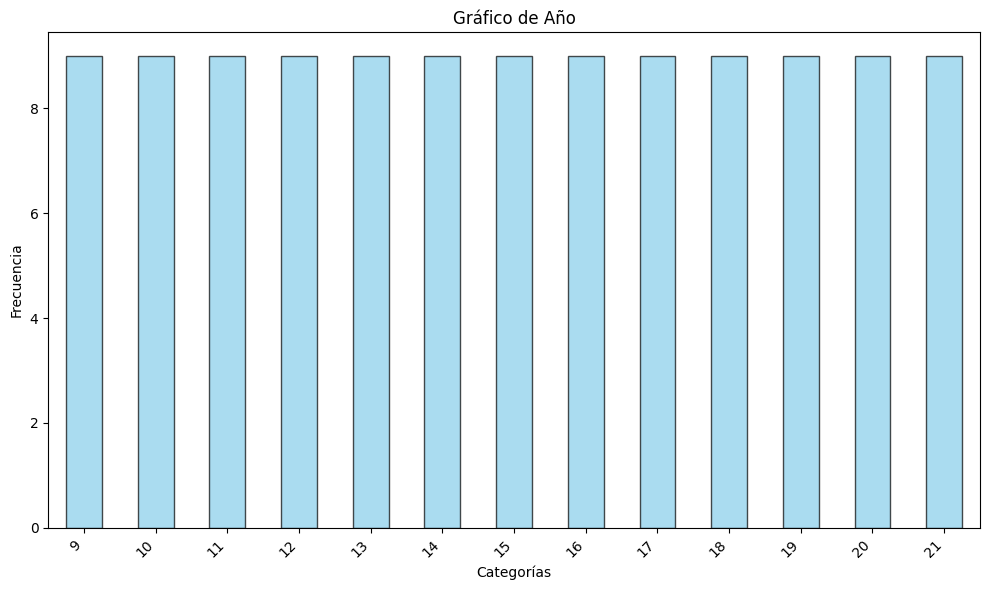

In [174]:
cualitativas = df.select_dtypes(include=['category']).columns.tolist()
  
for column in cualitativas: 
        normalidad.frecuencias(df[column], column)

### Gráficos Exploratorios

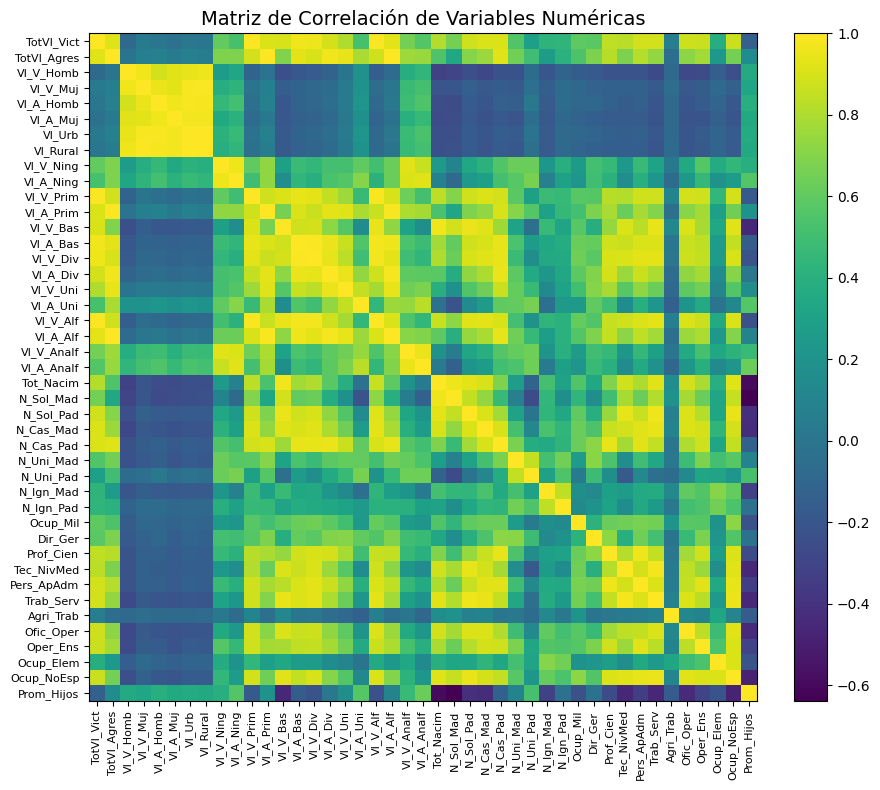

In [175]:
### 1. Matriz de correlación con Heatmap ###
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Diccionario para renombrar las columnas e índices (solo para la gráfica)
rename_dict = {
    "Grupo de Edad": "GrupoEdad",
    "Año": "Año",
    "Total VI Victima": "TotVI_Vict",
    "Total VI Agresor": "TotVI_Agres",
    "VI Victima Hombre": "VI_V_Homb",
    "VI Victima Mujer": "VI_V_Muj",
    "VI Agresor Hombre": "VI_A_Homb",
    "VI Agresor Mujer": "VI_A_Muj",
    "VI Urbano": "VI_Urb",
    "VI Rural": "VI_Rural",
    "VI Victima Ninguno": "VI_V_Ning",
    "VI Agresor Ninguno": "VI_A_Ning",
    "VI Victima Primaria": "VI_V_Prim",
    "VI Agresor Primaria": "VI_A_Prim",
    "VI Victima Básico": "VI_V_Bas",
    "VI Agresor Básico": "VI_A_Bas",
    "VI Victima Diversificado": "VI_V_Div",
    "VI Agresor Diversificado": "VI_A_Div",
    "VI Victima Universitario": "VI_V_Uni",
    "VI Agresor Universitario": "VI_A_Uni",
    "VI Victima Alfabeta": "VI_V_Alf",
    "VI Agresor Alfabeta": "VI_A_Alf",
    "VI Victima Analfabeta": "VI_V_Analf",
    "VI Agresor Analfabeta": "VI_A_Analf",
    "Total Nacimientos": "Tot_Nacim",
    "N Soltero Madre": "N_Sol_Mad",
    "N Soltero Padre": "N_Sol_Pad",
    "N Casado Madre": "N_Cas_Mad",
    "N Casado Padre": "N_Cas_Pad",
    "N Unido Madre": "N_Uni_Mad",
    "N Unido Padre": "N_Uni_Pad",
    "N Ignorado Madre": "N_Ign_Mad",
    "N Ignorado Padre": "N_Ign_Pad",
    "Ocupaciones militares": "Ocup_Mil",
    "Directores y gerentes": "Dir_Ger",
    "Profesionales científicos e intelectuales": "Prof_Cien",
    "Técnicos y profesionales de nivel medio": "Tec_NivMed",
    "Personal de apoyo administrativo": "Pers_ApAdm",
    "Trabajadores de los servicios y vendedores de comercios y mercados": "Trab_Serv",
    "Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros": "Agri_Trab",
    "Oficiales, operarios y artesanos de artes mecánicas y de otros oficios": "Ofic_Oper",
    "Operadores de instalaciones y máquinas y ensambladores": "Oper_Ens",
    "Ocupaciones elementales": "Ocup_Elem",
    "Ocupación no  especificada": "Ocup_NoEsp",
    "Promedio de Hijos": "Prom_Hijos"
}

# Crear una versión renombrada de la matriz de correlación
corr_matrix_renamed = corr_matrix.rename(index=rename_dict, columns=rename_dict)

plt.figure(figsize=(10, 8))
cax = plt.imshow(corr_matrix_renamed, cmap='viridis', interpolation='nearest')
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=14)

plt.xticks(
    ticks=np.arange(len(corr_matrix_renamed.columns)), 
    labels=corr_matrix_renamed.columns, 
    rotation=90, 
    fontsize=8
)
plt.yticks(
    ticks=np.arange(len(corr_matrix_renamed.index)), 
    labels=corr_matrix_renamed.index, 
    fontsize=8
)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


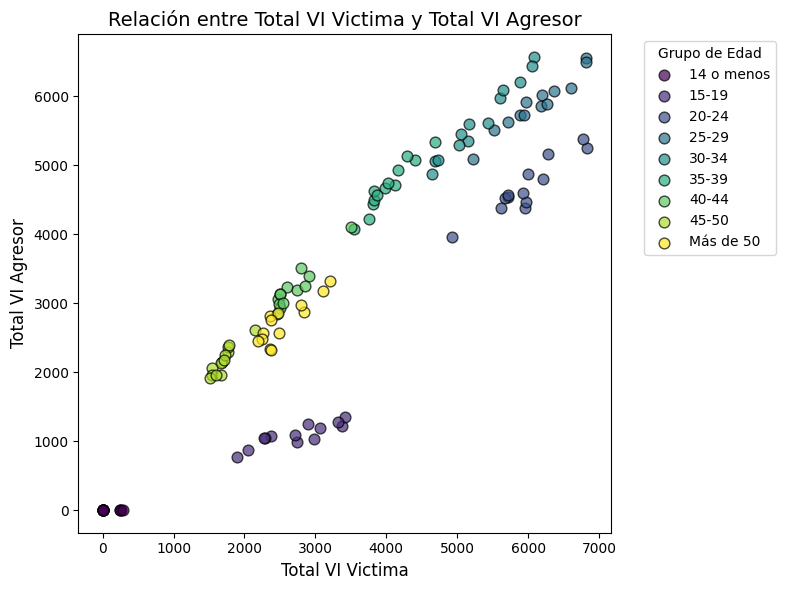

In [176]:
### 2. Gráfico de dispersión: Total VI Victima vs Total VI Agresor ###
# Usaremos "Grupo de Edad" para diferenciar con colores
grupos = df["Grupo de Edad"].cat.categories
colors = plt.cm.viridis(np.linspace(0, 1, len(grupos)))

plt.figure(figsize=(8, 6))
for grupo, color in zip(grupos, colors):
    subset = df[df["Grupo de Edad"] == grupo]
    plt.scatter(subset["Total VI Victima"], subset["Total VI Agresor"], 
                label=grupo, color=color, alpha=0.7, edgecolor='k', s=60)

plt.title("Relación entre Total VI Victima y Total VI Agresor", fontsize=14)
plt.xlabel("Total VI Victima", fontsize=12)
plt.ylabel("Total VI Agresor", fontsize=12)
plt.legend(title="Grupo de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\JM\AppData\Local\Temp\ipykernel_7308\1893785580.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=grupos, patch_artist=True,


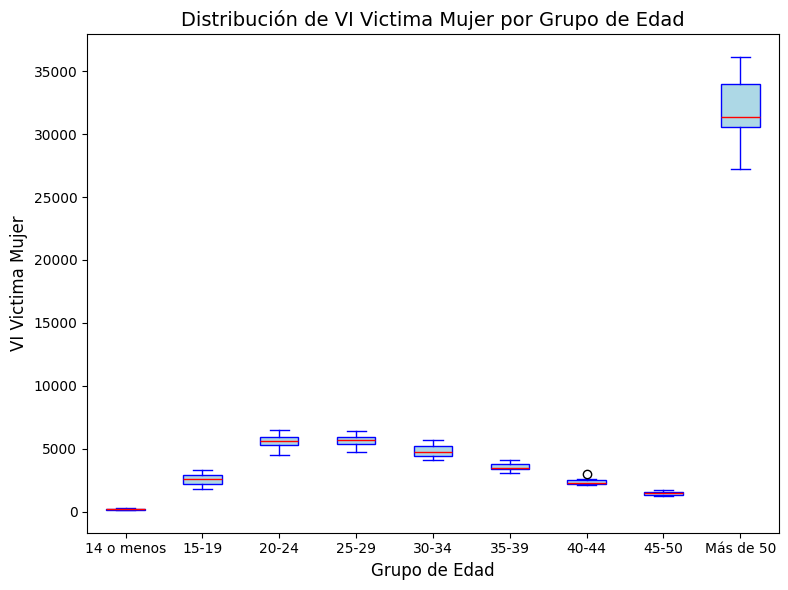

In [177]:
### 3. Boxplot: Distribución de VI Victima Mujer por Grupo de Edad ###
plt.figure(figsize=(8, 6))
# Extraemos los datos para cada grupo
data_box = [df[df["Grupo de Edad"] == grupo]["VI Victima Mujer"] for grupo in grupos]
plt.boxplot(data_box, labels=grupos, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.title("Distribución de VI Victima Mujer por Grupo de Edad", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("VI Victima Mujer", fontsize=12)
plt.tight_layout()
plt.show()

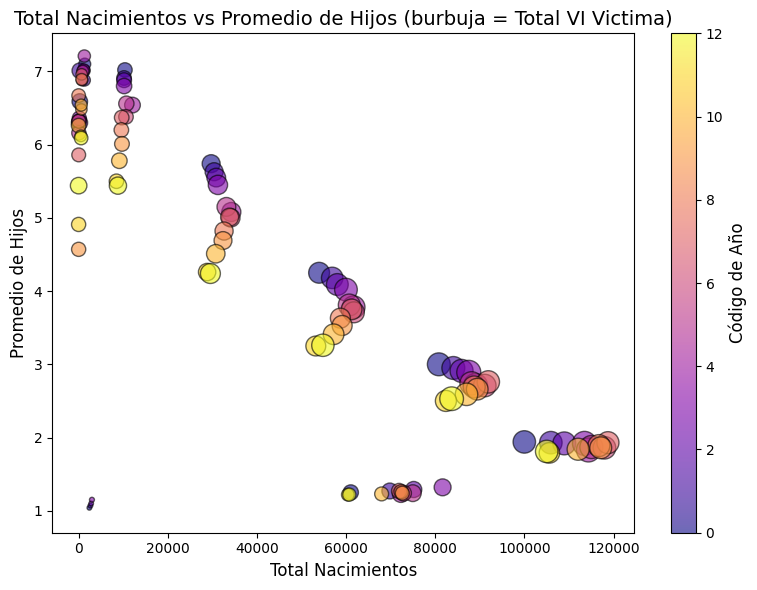

In [178]:
### 4. Gráfico de burbujas: Total Nacimientos vs Promedio de Hijos ###
# Usaremos el tamaño de la burbuja para representar el Total VI Victima (o cualquier otra variable de interés)
# Se escalan los tamaños para que sean visualmente comparables.
bubble_size = df["Total VI Victima"] / df["Total VI Victima"].max() * 300

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Total Nacimientos"], df["Promedio de Hijos"], 
                      s=bubble_size, alpha=0.6, c=df["Año"].cat.codes, cmap='plasma', edgecolor='k')
plt.title("Total Nacimientos vs Promedio de Hijos (burbuja = Total VI Victima)", fontsize=14)
plt.xlabel("Total Nacimientos", fontsize=12)
plt.ylabel("Promedio de Hijos", fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label("Código de Año", fontsize=12)
plt.tight_layout()
plt.show()

## Clusters

In [179]:
# Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
df_ = df.copy()
df_.pop("Ocupación no  especificada")

num_cols_select = selector(dtype_exclude=['object', 'category'])
cat_cols_select = selector(dtype_include=['object', 'category'])

num_cols = num_cols_select(df_)
cat_cols = cat_cols_select(df_)

cat_pp = OneHotEncoder(handle_unknown="ignore")
num_pp = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', cat_pp, cat_cols),
    ('standar-scaler', num_pp,num_cols)
    ])
print(num_cols)
print(cat_cols)

['Total VI Victima', 'Total VI Agresor', 'VI Victima Hombre', 'VI Victima Mujer', 'VI Agresor Hombre', 'VI Agresor Mujer', 'VI Urbano', 'VI Rural', 'VI Victima Ninguno', 'VI Agresor Ninguno', 'VI Victima Primaria', 'VI Agresor Primaria', 'VI Victima Básico', 'VI Agresor Básico', 'VI Victima Diversificado', 'VI Agresor Diversificado', 'VI Victima Universitario', 'VI Agresor Universitario', 'VI Victima Alfabeta', 'VI Agresor Alfabeta', 'VI Victima Analfabeta', 'VI Agresor Analfabeta', 'Total Nacimientos', 'N Soltero Madre', 'N Soltero Padre', 'N Casado Madre', 'N Casado Padre', 'N Unido Madre', 'N Unido Padre', 'N Ignorado Madre', 'N Ignorado Padre', 'Ocupaciones militares', 'Directores y gerentes', 'Profesionales científicos e intelectuales', 'Técnicos y profesionales de nivel medio', 'Personal de apoyo administrativo', 'Trabajadores de los servicios y vendedores de comercios y mercados', 'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros', 'Oficiales, operar

In [180]:
# print(df.isna().sum())
from sklearn.preprocessing import RobustScaler
X_num = df_[list(num_cols)]
X_cat = df_[list(cat_cols)]
num_pp = RobustScaler()
cat_pp = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

num_tr = num_pp.fit_transform(X_num)
cat_tr = cat_pp.fit_transform(X_cat)

cat_feature_names = cat_pp.get_feature_names_out(cat_cols)
all_feature_names = list(cat_feature_names) +num_cols  # Combine categorical & numerical names
num_df = pd.DataFrame(num_tr, columns=num_cols, index=df_.index)
cat_df = pd.DataFrame(cat_tr, columns=cat_feature_names, index=df_.index)

# Convert to DataFrame

X_final = pd.concat([num_df, cat_df], axis=1)
X = pd.DataFrame(X_final, columns=all_feature_names)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 64 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Grupo de Edad_14 o menos                                                       117 non-null    float64
 1   Grupo de Edad_15-19                                                            117 non-null    float64
 2   Grupo de Edad_20-24                                                            117 non-null    float64
 3   Grupo de Edad_25-29                                                            117 non-null    float64
 4   Grupo de Edad_30-34                                                            117 non-null    float64
 5   Grupo de Edad_35-39                                                            117 non-null    float64
 6   Grupo de Edad_40-44       

In [181]:

import clusters
from pprint import pprint
fields = clusters.get_features(
    X=X,
    v_threshold=5,
    n_pca=10,
    mi_crit=0.2, 
    rf_crit = 0.035)
pprint(fields, width=40)
methods = ["mutual_info",
               "pca",
               "random_forest",
               "variance_threshold"]
best_features = list(fields[methods[3]].keys())

{'mutual_info': {'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros': 0.25208311467614775,
                 'N Ignorado Madre': 0.21888419251266922,
                 'N Soltero Madre': 0.27030745329535244,
                 'Ocupaciones elementales': 0.5779984090632312,
                 'Promedio de Hijos': 0.3542480879944161,
                 'Total Nacimientos': 0.2613088198573683,
                 'Técnicos y profesionales de nivel medio': 0.21056018174678193},
 'pca': {'Año_9': 0.0009561111310038293,
         'Grupo de Edad_14 o menos': 0.7947880328459676,
         'Grupo de Edad_15-19': 0.11277124719325604,
         'Grupo de Edad_20-24': 0.05966408412373871,
         'Grupo de Edad_25-29': 0.01456399389324945,
         'Grupo de Edad_30-34': 0.004515801782108794,
         'Grupo de Edad_35-39': 0.003426347454982616,
         'Grupo de Edad_40-44': 0.0027483352395417035,
         'Grupo de Edad_45-50': 0.0019575300416557026,
         'Grupo de Edad_Más d

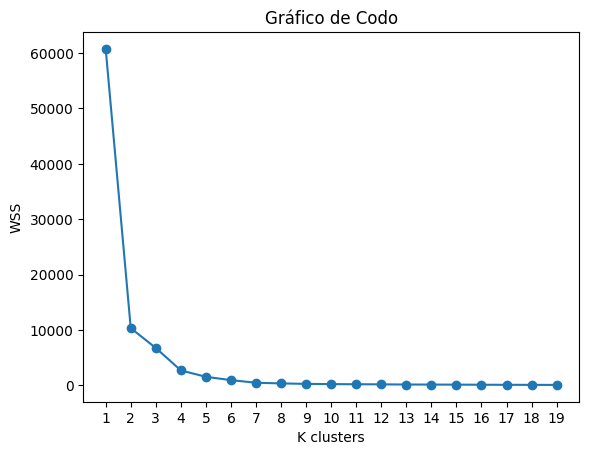

c:\Python312\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


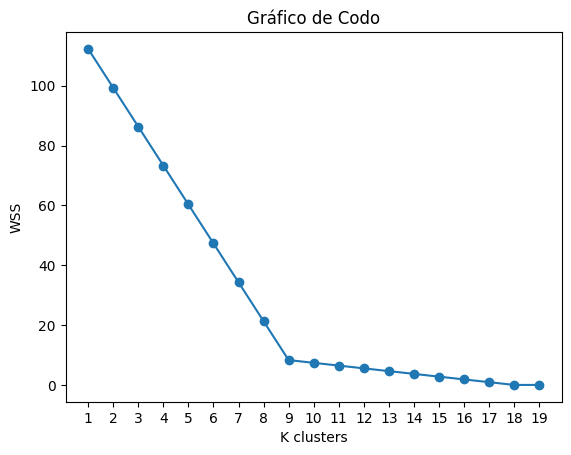

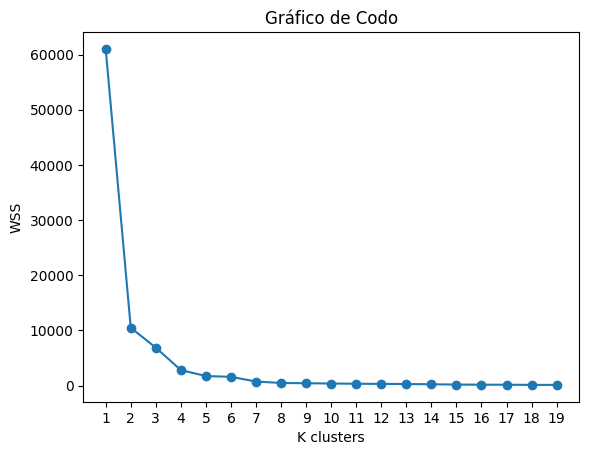

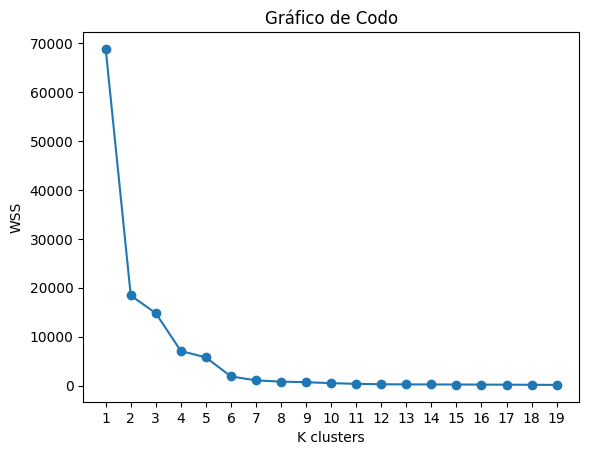

In [182]:
# Cluster addition
for i in methods:
    best_features = list(fields[i].keys())
    X_reduced = X_reduced = X[best_features]
    clusters.elbow(X_reduced)


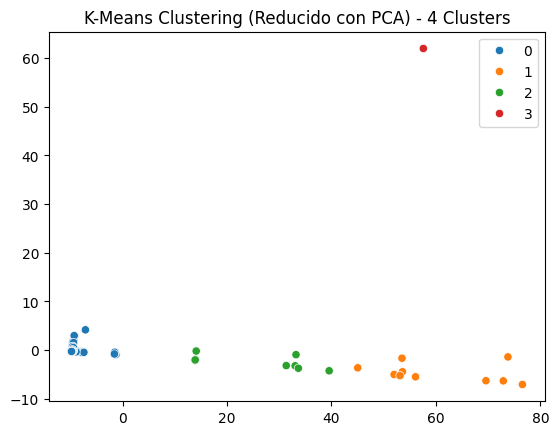

For n_clusters = 2 The average silhouette_score is : 0.879141458726277
For n_clusters = 3 The average silhouette_score is : 0.8799741344958263
For n_clusters = 4 The average silhouette_score is : 0.8522656181847466
For n_clusters = 5 The average silhouette_score is : 0.8514592701929944


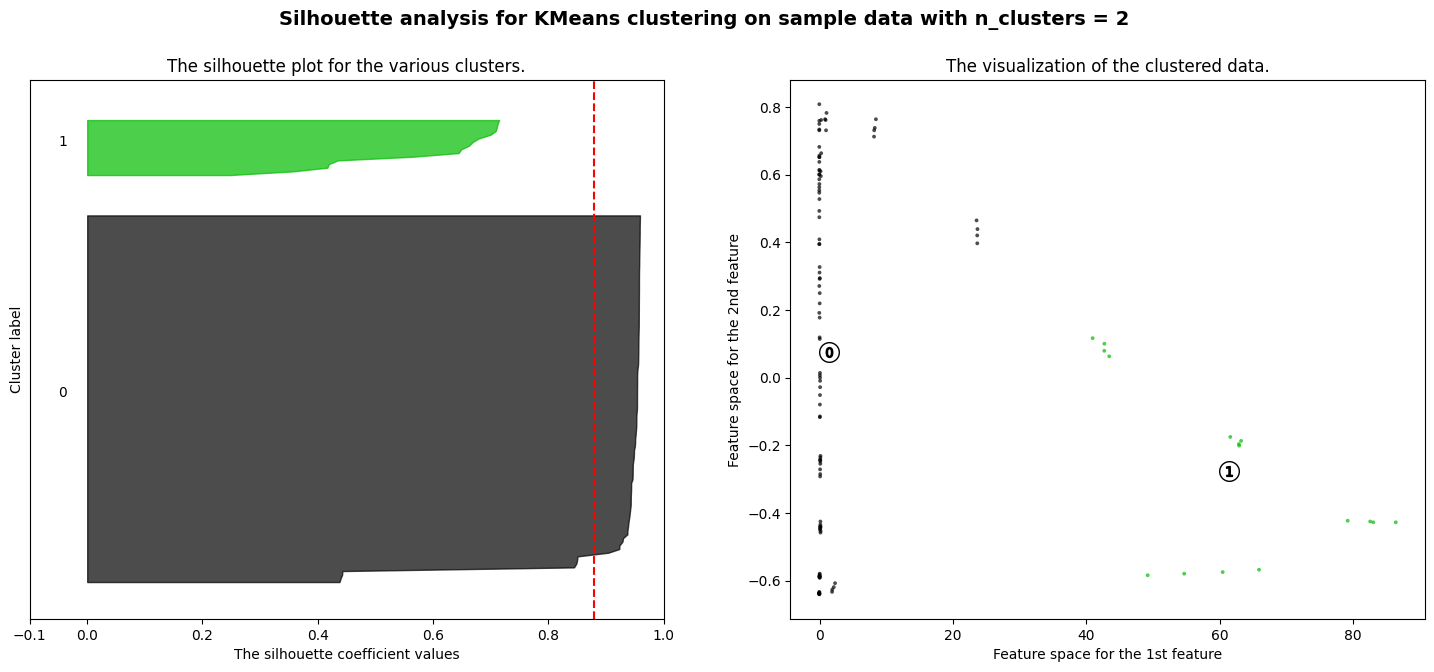

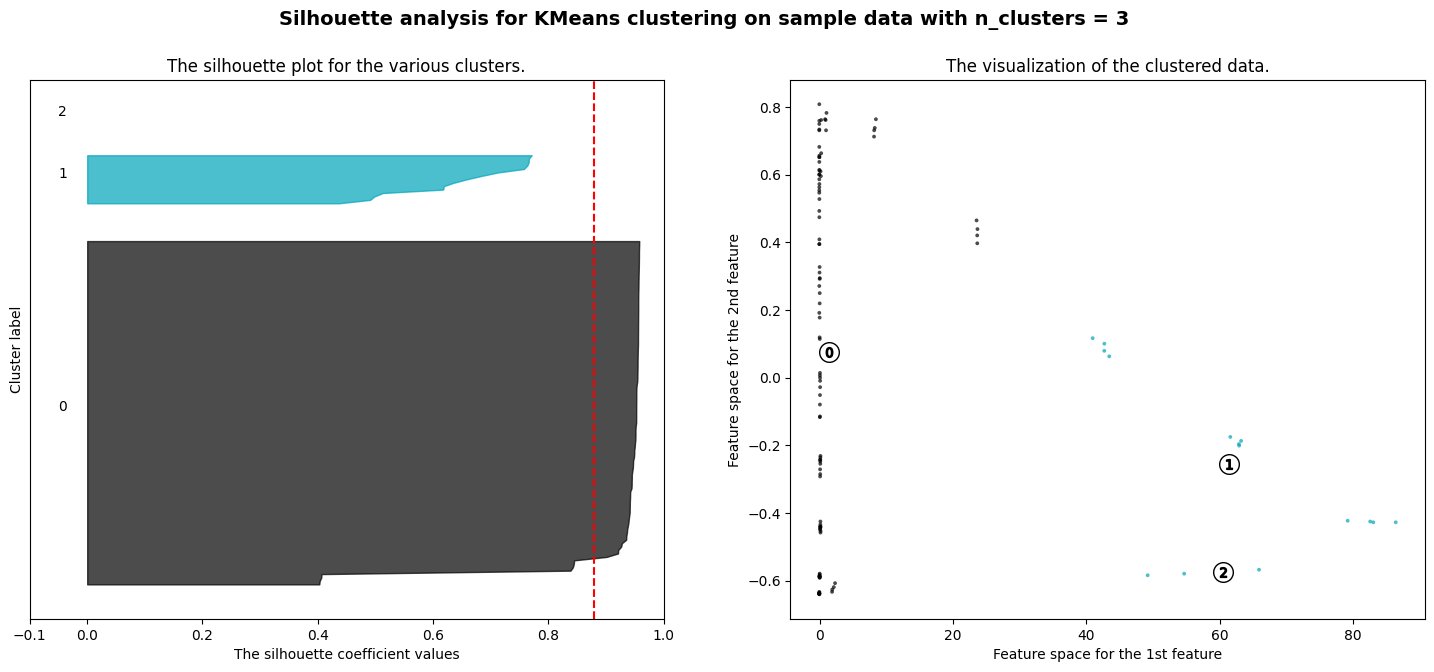

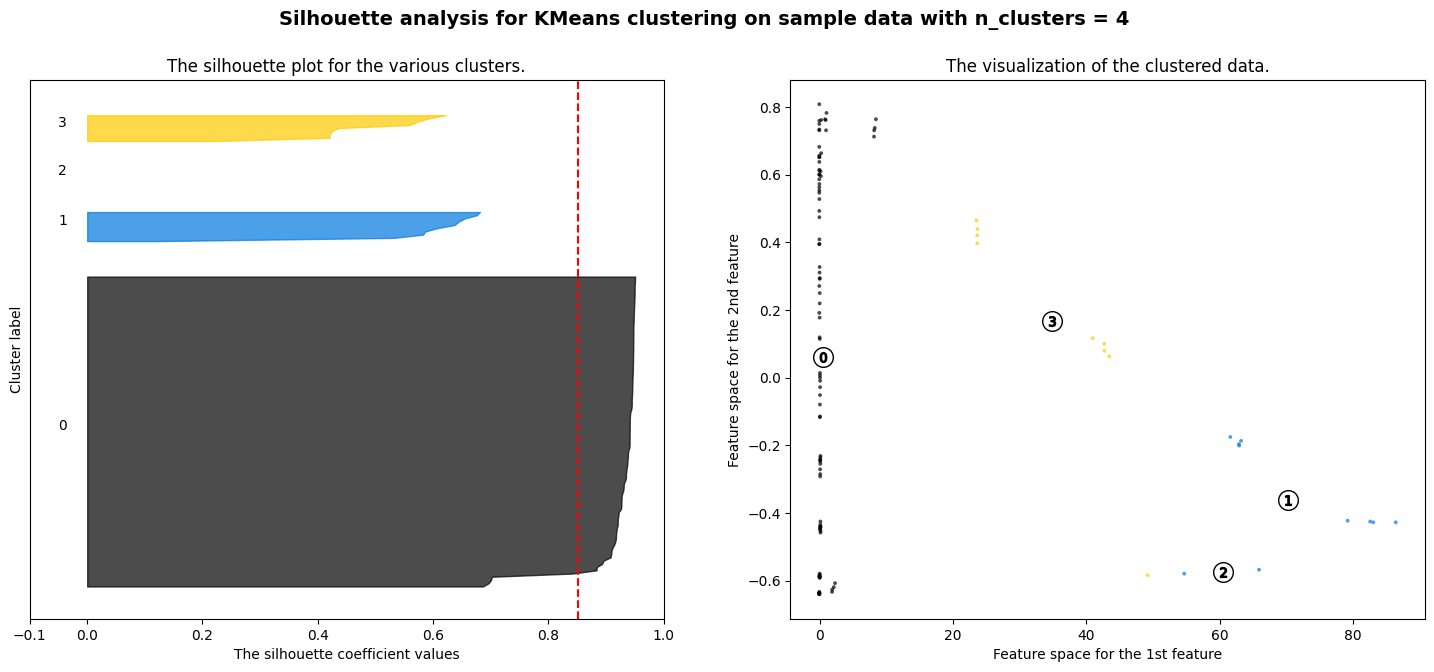

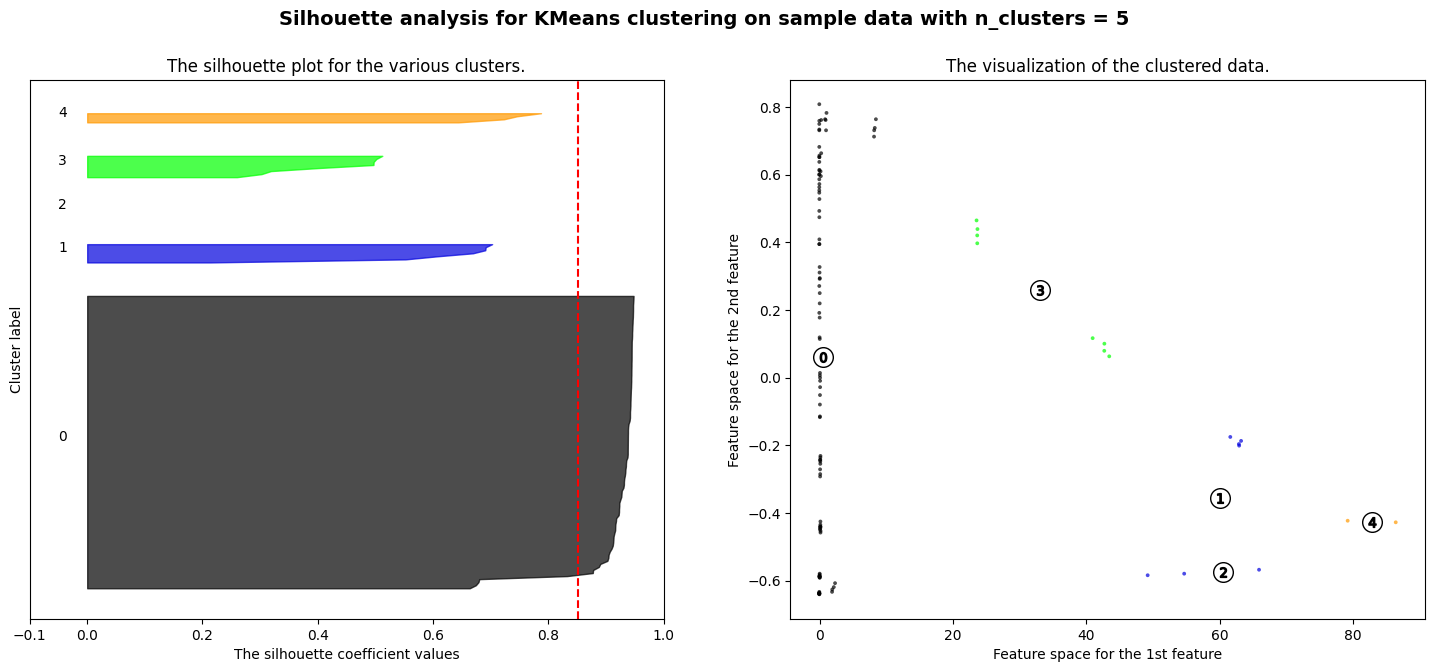

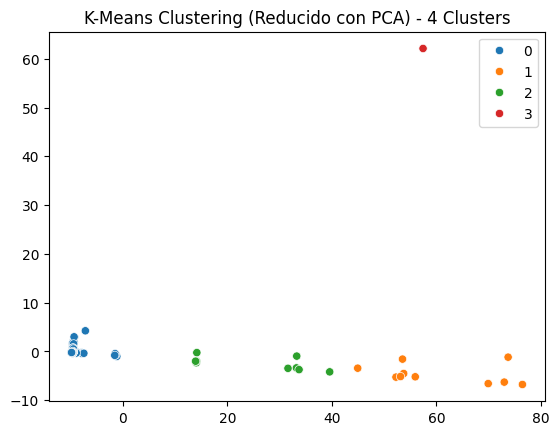

For n_clusters = 2 The average silhouette_score is : 0.8786619873235336
For n_clusters = 3 The average silhouette_score is : 0.8794135069373612
For n_clusters = 4 The average silhouette_score is : 0.8507708298199479
For n_clusters = 5 The average silhouette_score is : 0.7813433323848892


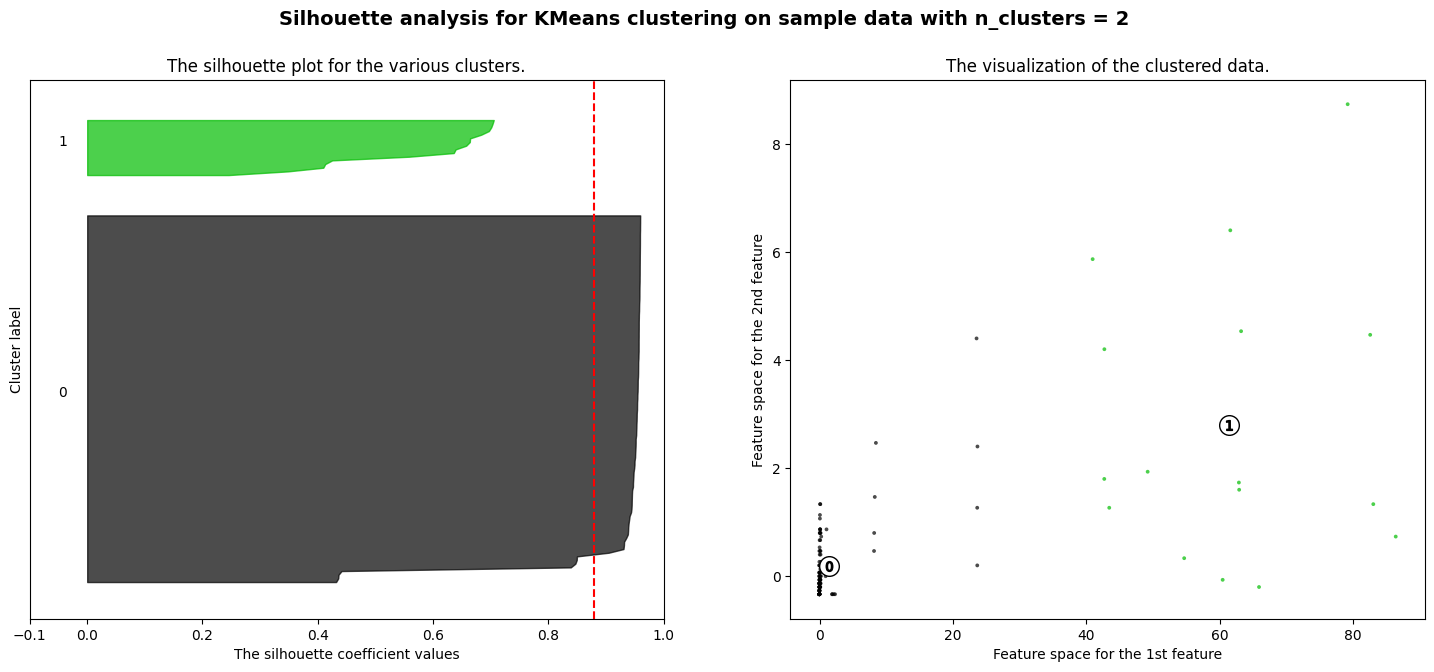

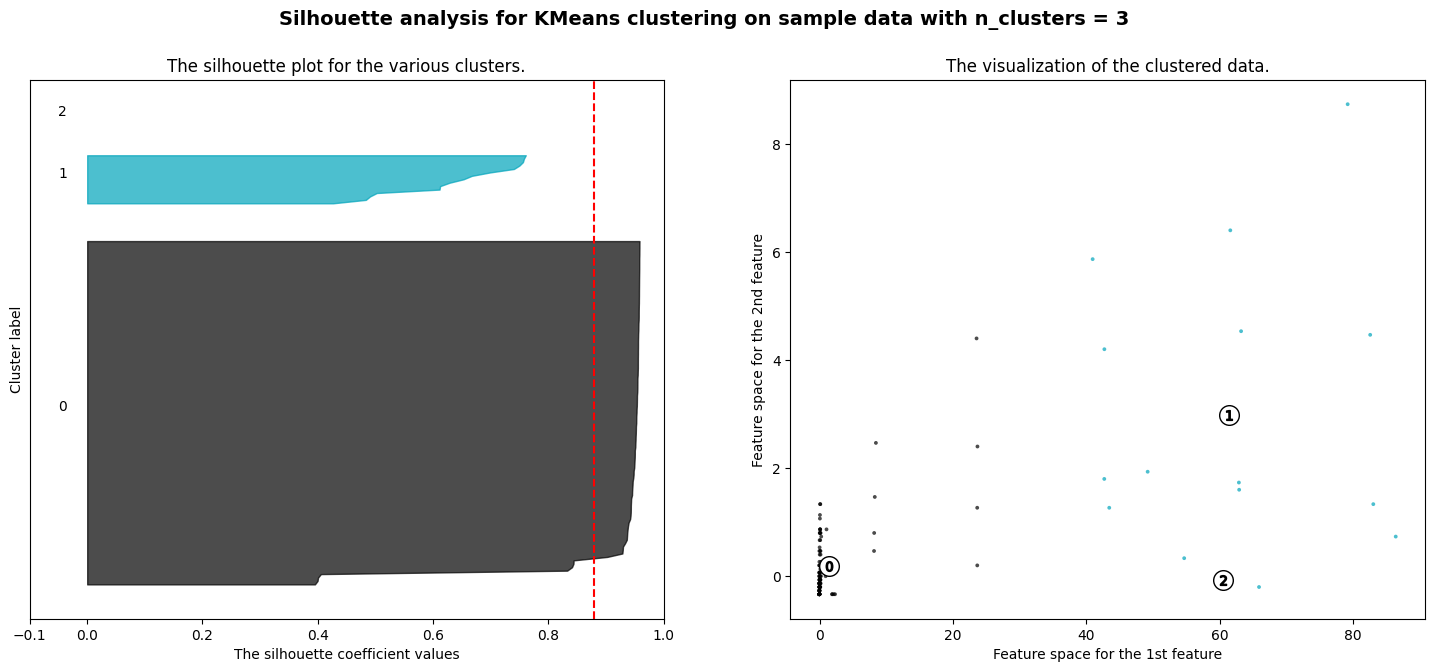

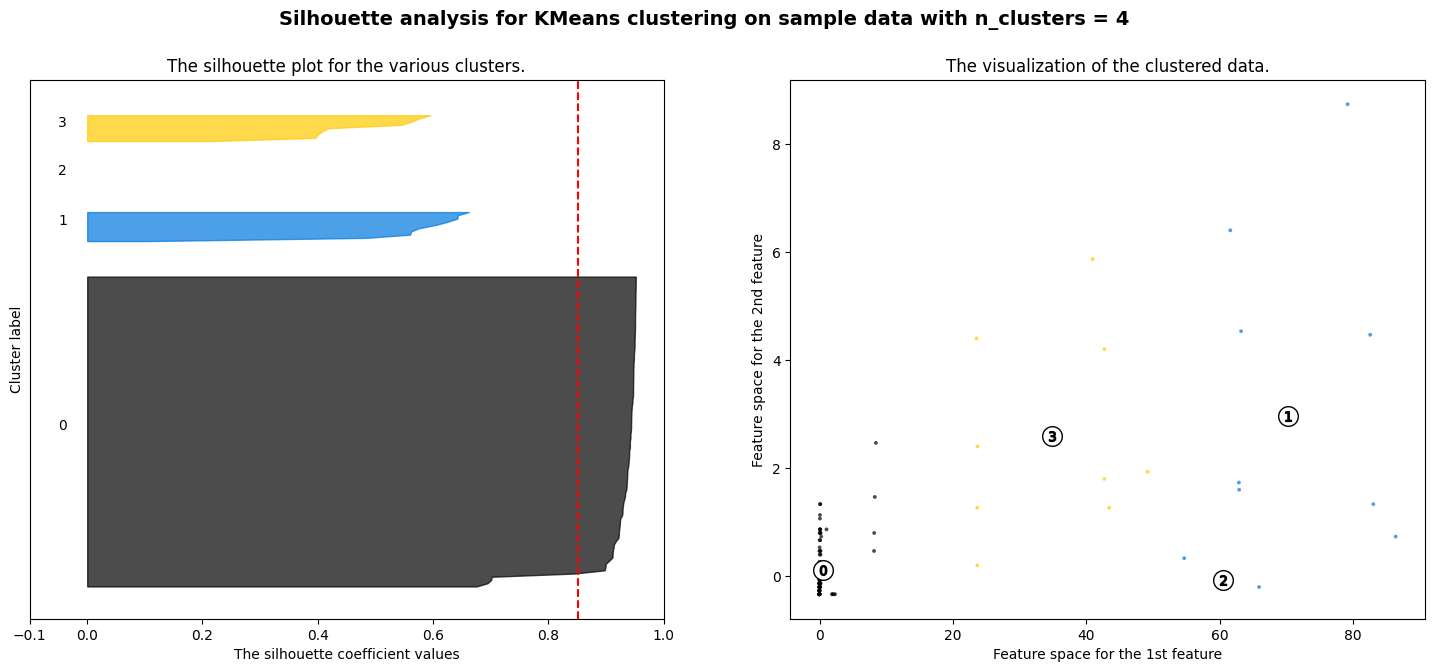

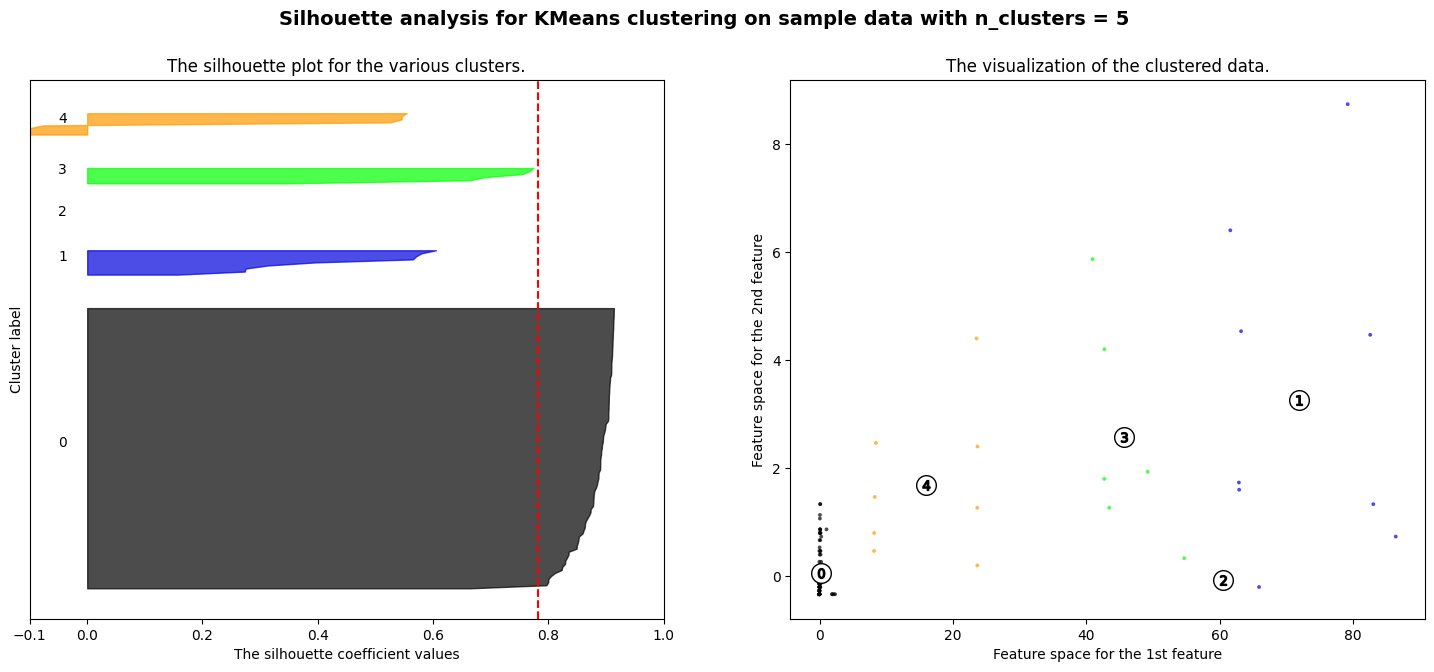

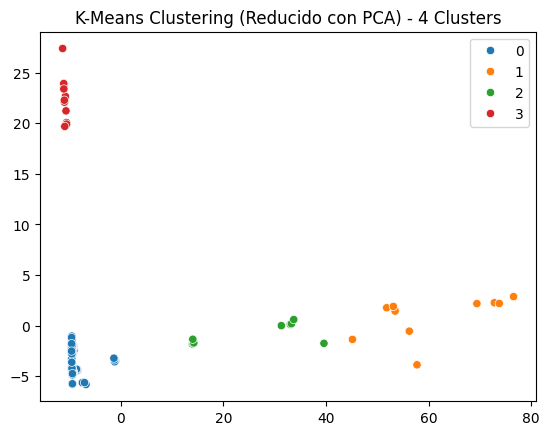

For n_clusters = 2 The average silhouette_score is : 0.8068573000411047
For n_clusters = 3 The average silhouette_score is : 0.7968332868506116
For n_clusters = 4 The average silhouette_score is : 0.7776963523349607
For n_clusters = 5 The average silhouette_score is : 0.804540469437375


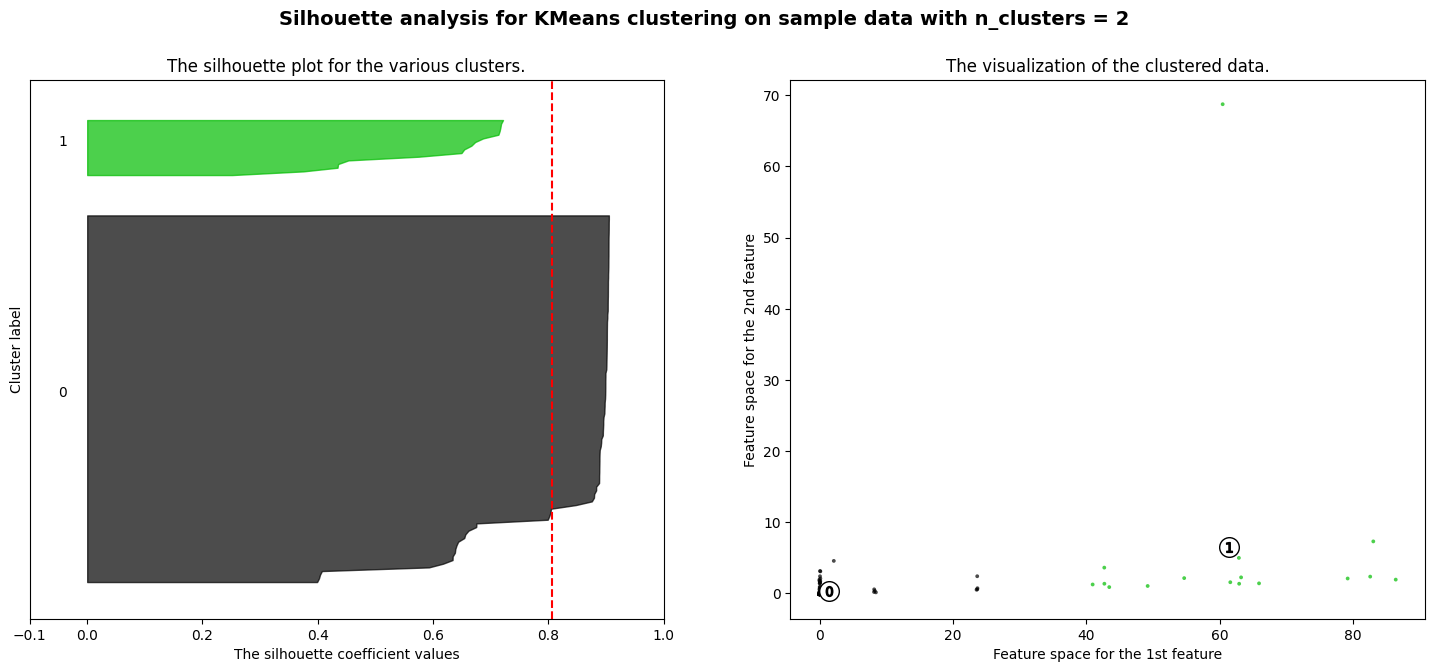

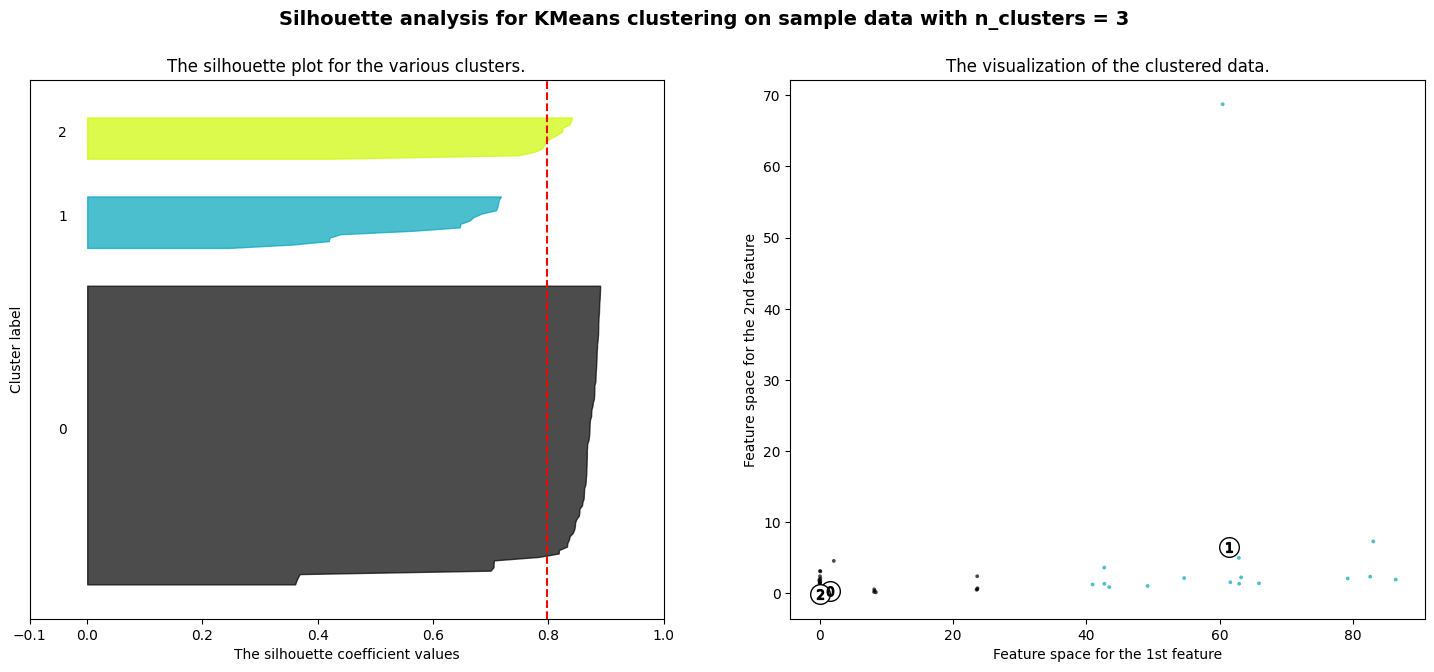

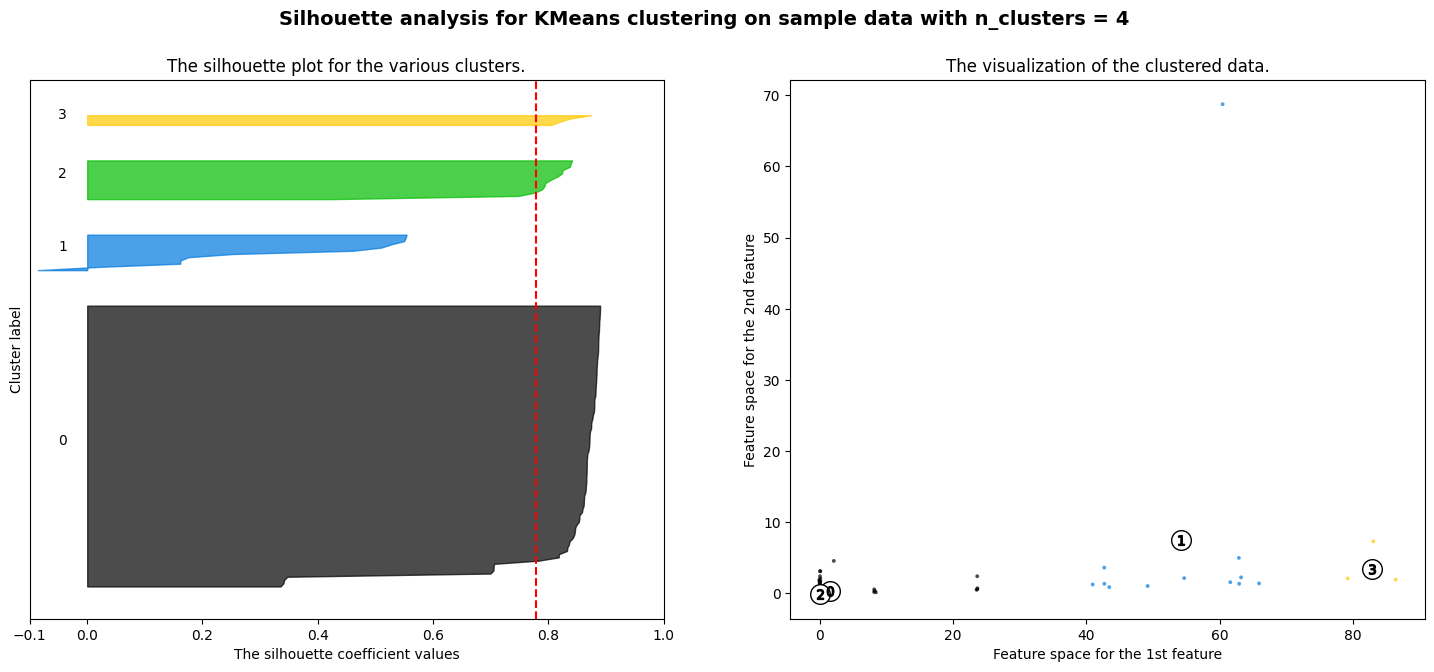

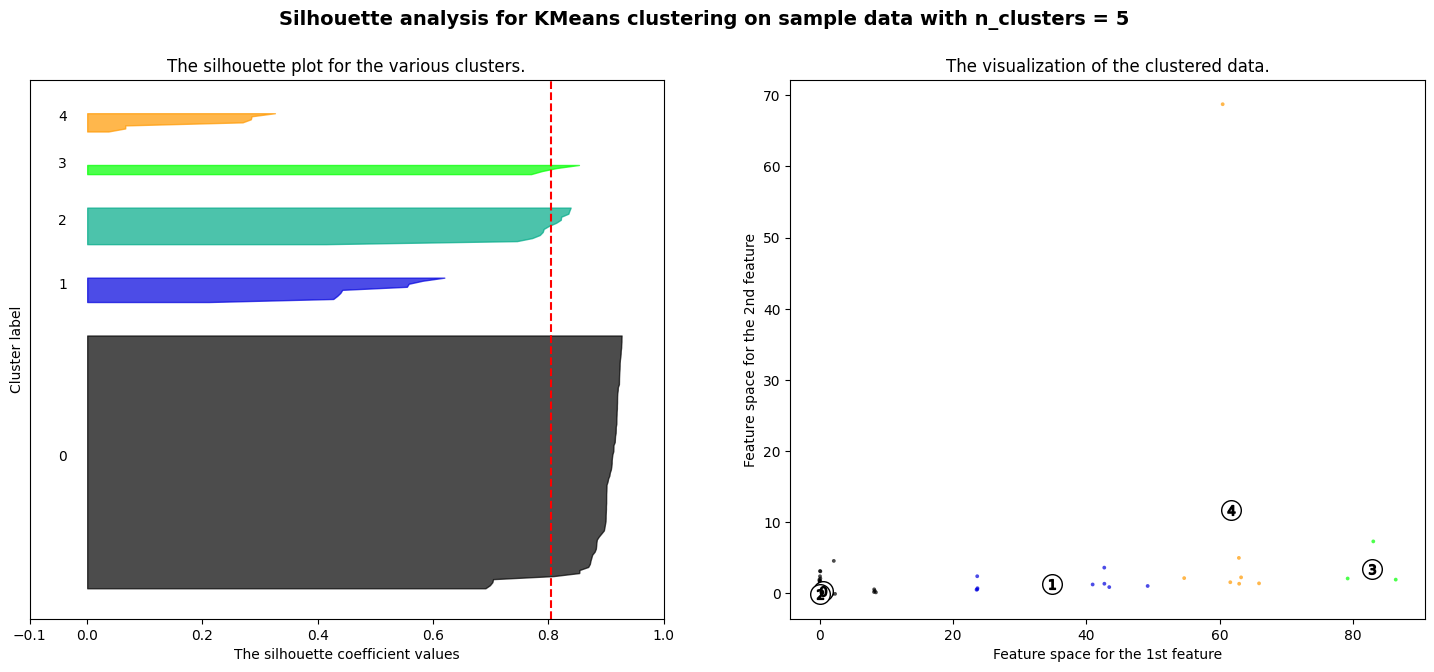

Index(['Grupo de Edad_14 o menos', 'Grupo de Edad_15-19',
       'Grupo de Edad_20-24', 'Grupo de Edad_25-29', 'Grupo de Edad_30-34',
       'Grupo de Edad_35-39', 'Grupo de Edad_40-44', 'Grupo de Edad_45-50',
       'Grupo de Edad_Más de 50', 'Año_9', 'Año_10', 'Año_11', 'Año_12',
       'Año_13', 'Año_14', 'Año_15', 'Año_16', 'Año_17', 'Año_18', 'Año_19',
       'Año_20', 'Año_21', 'Total VI Victima', 'Total VI Agresor',
       'VI Victima Hombre', 'VI Victima Mujer', 'VI Agresor Hombre',
       'VI Agresor Mujer', 'VI Urbano', 'VI Rural', 'VI Victima Ninguno',
       'VI Agresor Ninguno', 'VI Victima Primaria', 'VI Agresor Primaria',
       'VI Victima Básico', 'VI Agresor Básico', 'VI Victima Diversificado',
       'VI Agresor Diversificado', 'VI Victima Universitario',
       'VI Agresor Universitario', 'VI Victima Alfabeta',
       'VI Agresor Alfabeta', 'VI Victima Analfabeta', 'VI Agresor Analfabeta',
       'Total Nacimientos', 'N Soltero Madre', 'N Soltero Padre',
       'N C

In [186]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
# Punto atipico

import seaborn as sns
method_cluster = {
    "mutual_info": 4,
    "random_forest": 4,
    "variance_threshold": 4
}
for i in method_cluster.keys():
    best_features = list(fields[i].keys())
    X_reduced = X[best_features]
    km = KMeans(n_clusters=method_cluster[i], random_state=42).fit(X_reduced)
    X[f"cluster_{i}"] = km.labels_
    # Graph
    X_pca = PCA(n_components=2).fit_transform(X_reduced)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X[f"cluster_{i}"], palette="tab10", legend="full")

    plt.title(f"K-Means Clustering (Reducido con PCA) - 4 Clusters")
    plt.legend()
    plt.show()
    X_array = np.array(X_reduced)
    clusters.sillhouette(np.arange(2,method_cluster[i]+2),X_array)
# X.to_csv("DataCluster.csv", index=False)  
print(X.columns)

### Eleccion de mutual info
De los clusteres pasados, la agrupacion que parece tener mayor relacion con variables tanto de natalidad como de violencia intrafamiliar (precisamente, la relacion que queremos buscar) fue mutual info. Los demas clusteres podrian tambien ser utilizados en un futuro. Sin embargo, para la continuacion de este analisis, se utilizaran simplemente los clusteres de mutual information

In [234]:
from sklearn.cluster import KMeans, AgglomerativeClustering

X_mi = X.copy()
X_mi.pop("cluster_random_forest")
X_mi.pop("cluster_variance_threshold")
print(X.groupby("cluster_mutual_info")["Total Nacimientos"].count())


cluster_mutual_info
0    97
1    10
2     9
3     1
Name: Total Nacimientos, dtype: int64


### Clusters menores
Como se pudo ver anteriormente, un grupo domina sobre los demas en cuestion cantidad de observaciones. Para poder realizar grupos que aporten mas informacion, se procedera mas adelante a realizar una aglomeracion de subclusters para tendencias dentro de este grupo que basicamente representa todo el dataset.
Sin embargo, primero hay que observar las tendencias de los grupos menores. Se sasbe que el Cluster 3 representa un punto atipico, pero es necesario osbervar la tendencia tambien de los demas para observar si pueden ser descartados, simplificados o integrados a otro cluster


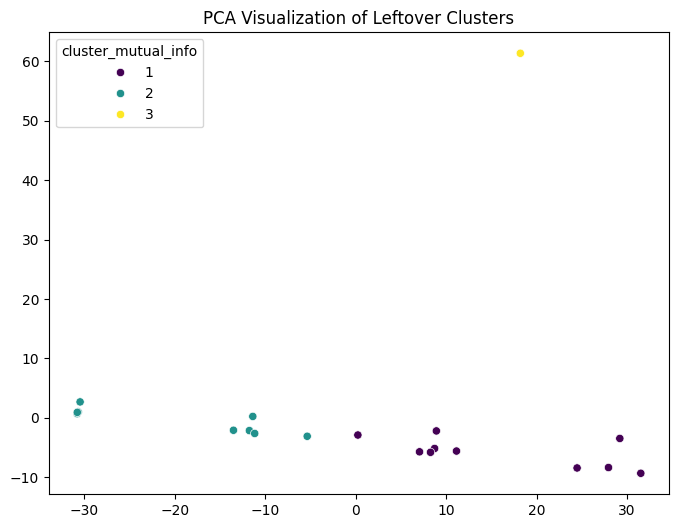

In [235]:
X_mi = X.copy()
leftovers = X_mi[X_mi["cluster_mutual_info"] != 0]  
pca = PCA(n_components=2)  # Use 3 for 3D plots
pca_result = pca.fit_transform(leftovers)
plt.figure(figsize=(8,6))
sns.scatterplot( x=pca_result[:, 0], y=pca_result[:, 1], hue=leftovers["cluster_mutual_info"], palette="viridis")
plt.title("PCA Visualization of Leftover Clusters")
plt.show()

### Punto atipico
Este punto se aglomera a su propio cluster y no aporta a la conglomeracion de datos. Investigandolo aparte, se logro observar que el campo que conlleva la gran parte de su desviacion es en la cantidad de agricultores. Para la realizacion de clusteres, se excluira del dataset, sin embargo, es importante justificar el compportamiento de este punto atipico, lo cual se realizara en el informe del analisis exploratorio

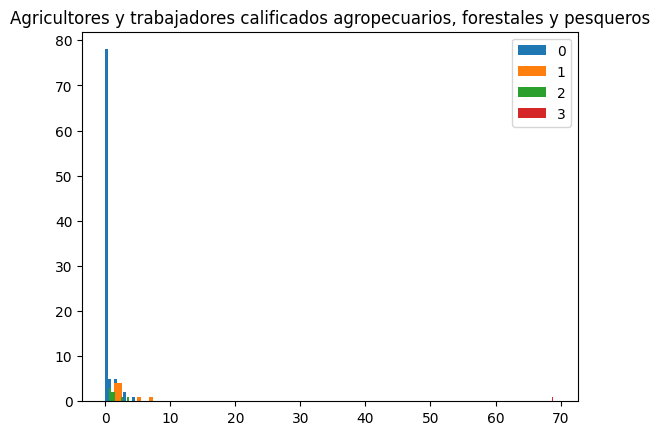

In [236]:
id = X_mi[X_mi["cluster_mutual_info"]==3].index
outlier = X_mi[X_mi["cluster_mutual_info"]==3]
mean_values = X_mi.mean()
# Compute the difference
feature_deviation = outlier - mean_values

outlier_features= [
    "Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros",
]

for f in outlier_features:
    plt.title(f)
    for c in [0,1,2,3]:
        
        plt.hist(X_mi[X_mi["cluster_mutual_info"]==c][f],label=c)
    plt.legend()
    plt.show()

# Eliminacion de punto atipico
X_mi = X_mi.drop(index=X_mi[X_mi["cluster_mutual_info"]==3].index)



### Aglomearcion con subclusters


In [238]:

labels = np.array(X_mi["cluster_mutual_info"] )
largest_cluster = max(set(labels), key=list(labels).count)
large_cluster_mask = labels == largest_cluster
large_cluster_points = X_mi[X_mi["cluster_mutual_info"]==largest_cluster]

# Step 3: Apply Hierarchical Clustering to the large cluster
subcluster_model = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
sub_labels = subcluster_model.fit_predict(large_cluster_points)

# Step 4: Merge new cluster assignments back
new_labels = labels.copy()
new_labels[large_cluster_mask] = sub_labels + (labels.max() + 1)  # Offset new cluster labels

# Step 5: Store new labels in the original dataframe
X_mi["Refined_Clusters"] = new_labels
print(X_mi.groupby("Refined_Clusters")["Total Nacimientos"].count())
X_mi.pop("cluster_mutual_info")
X_mi.pop("cluster_random_forest")
X_mi.pop("cluster_variance_threshold")
X_mi.to_csv("DataCluster.csv",index=False)

Refined_Clusters
1    10
2     9
3    48
4    13
5    36
Name: Total Nacimientos, dtype: int64


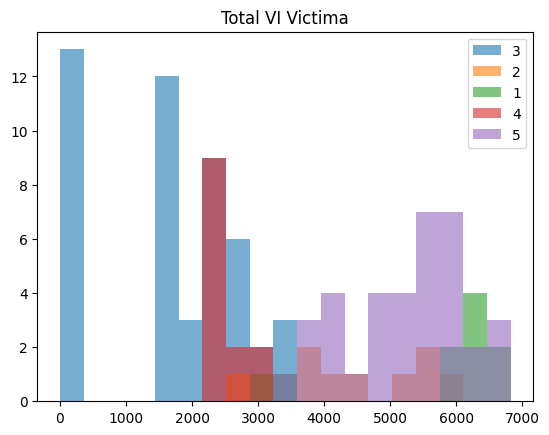

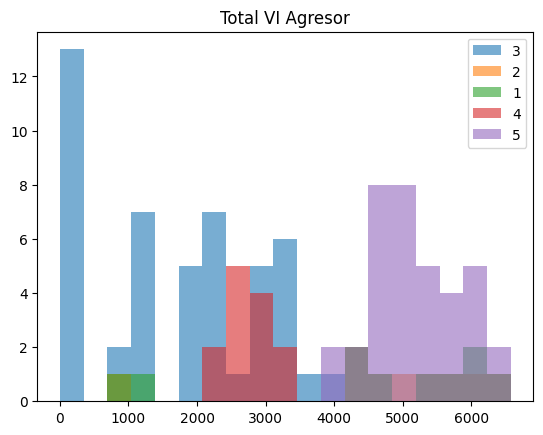

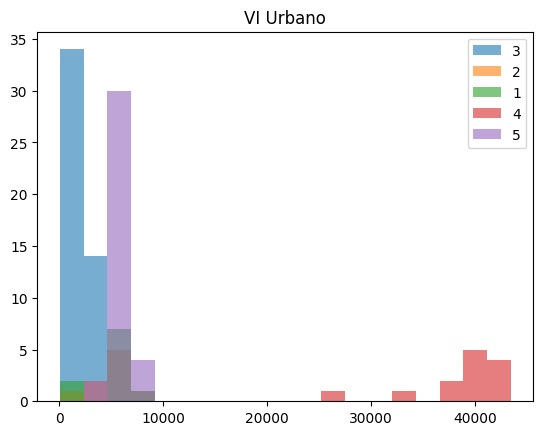

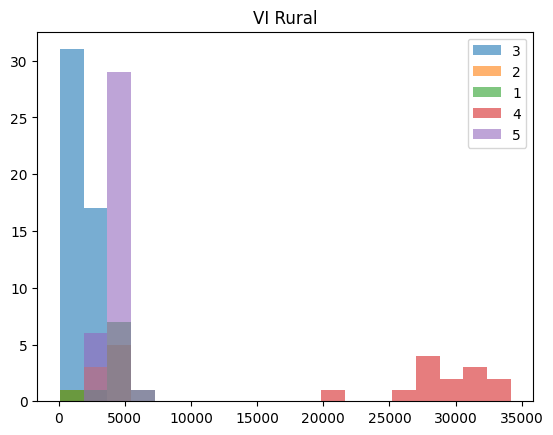

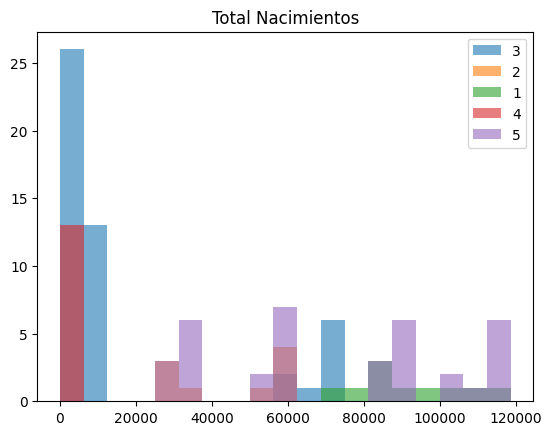

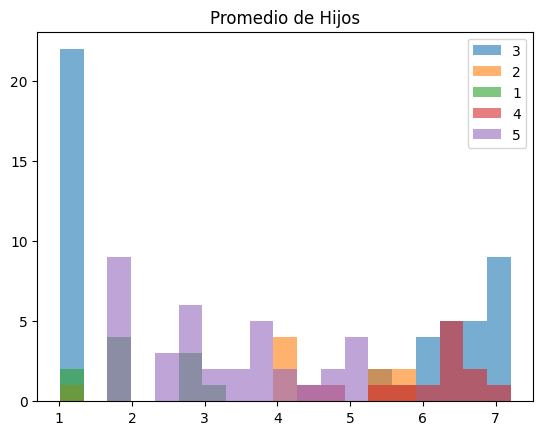

Refined_Clusters
1    10
2     9
3    48
4    13
5    36
Name: Total Nacimientos, dtype: int64


In [203]:
dfcopy = df.copy()
dfcopy = dfcopy.drop(index=19)
dfcopy["Refined_Clusters"] = X_mi["Refined_Clusters"]
important_features= [
    "Total VI Victima","Total VI Agresor",
    "VI Urbano","VI Rural",
#     VI Victima Hombre,VI Victima Mujer,VI Agresor Hombrem VI Agresor Muje
# VI Urbano,VI Rural
# "VI Victima Alfabeta","VI Agresor Alfabeta","VI Victima Analfabeta","VI Agresor Analfabeta",
"Total Nacimientos",
"Promedio de Hijos"
# "N Soltero Madre","N Soltero Padre","N Casado Madre","N Casado Padre",
# N Unido Madre,N Unido Padre,N Ignorado Madre,N Ignorado Padre,
]
clusters = list(dfcopy["Refined_Clusters"].unique())
for i in important_features:
    plt.title(i)
    global_min = dfcopy[i].min()
    global_max = dfcopy[i].max()

    # Define common bin edges
    bins = np.linspace(global_min, global_max, 20)  # Adjust 20 for more/less bins

    for c in clusters:
        plt.hist(dfcopy[dfcopy["Refined_Clusters"]==c][i],alpha= 0.6,bins=bins,label=c)
    plt.legend()
    plt.show()
print(X_mi.groupby("Refined_Clusters")["Total Nacimientos"].count())

C:\Users\JM\AppData\Local\Temp\ipykernel_7308\1969904549.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tem2 = tem.groupby("Año")[f].mean()


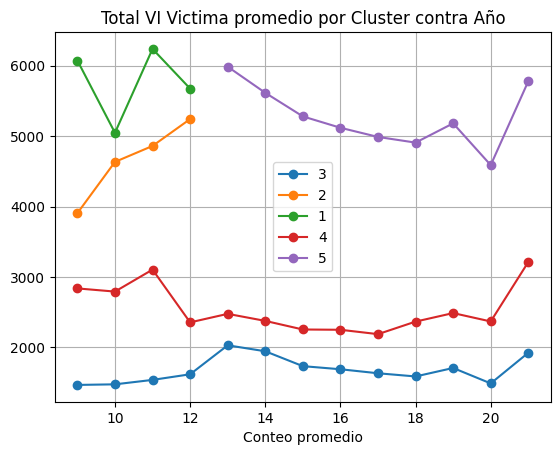

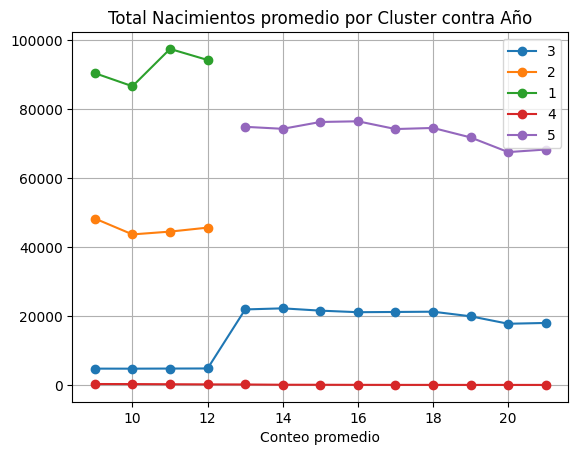

In [232]:
years = list(dfcopy["Año"].unique())
to_evaluate = ["Total VI Victima","Total Nacimientos"]
X_years = dfcopy[["Año","Refined_Clusters","Total Nacimientos","Total VI Victima"]]
for f in to_evaluate:
    plt.title(f"{f} promedio por Cluster contra Año")
    for c in clusters:
        tem = X_years[X_years["Refined_Clusters"]==c]
        tem2 = tem.groupby("Año")[f].mean()
        plt.plot(tem2, '-o', label=c)
        plt.grid()
    plt.xlabel("Año")
    plt.xlabel("Conteo promedio")
    plt.legend()
    plt.show()
